In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization


from ase.build import bulk
from ase.io.trajectory import Trajectory
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from sklearn.model_selection import train_test_split 
from sklearn.kernel_ridge import KernelRidge 
from dscribe.descriptors import CoulombMatrix, SineMatrix, EwaldSumMatrix, SOAP
from ase import Atoms
from ase.io import read

import cWT

/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
pwd

'/Users/valeria/Documents/aiWT/Final_version/wt/Results/EOS'

In [3]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [4]:
Ks_energy = np.load('./KS_energy.npy')

Ks_Btin_TE = np.asarray(Ks_energy)[0]
Ks_fcc_TE = np.asarray(Ks_energy)[1]
Ks_bcc_TE = np.asarray(Ks_energy)[2]
Ks_8cd_TE = np.asarray(Ks_energy)[3]
Ks_7cd_TE = np.asarray(Ks_energy)[4]

In [8]:
import os
os.chdir('../')
path_file = os.getcwd()

In [9]:
path_file

'/Users/valeria/Documents/aiWT/Final_version/wt'

In [10]:
Ks_sh_TE = []
Ks_bct5_TE = []
Ks_hcp_TE = []
Ks_dhcp_TE = []
Ks_cbcc_TE = []

for i in np.arange(0,30,1):
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_sh/Si_sh'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_sh = str(k).split()[6]
    Ks_sh_TE.append(float(KS_sh))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_bct5/Si_bct5'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_bct5 = str(k).split()[6]
    Ks_bct5_TE.append(float(KS_bct5))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_hcp/Si_hcp'+str(i)+'.out') as A:
        k = [match for match in A if "Total energy" in match]
    KS_hcp = str(k).split()[6]
    Ks_hcp_TE.append(float(KS_hcp))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_dhcp/Si_dhcp'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_dhcp = str(k).split()[6]
    Ks_dhcp_TE.append(float(KS_dhcp))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_cbcc/qe_calculations/si_'+str(i)+'.out') as D:
        k = [match for match in D if "!    total energy" in match]
    KS_cbcc = str(k).split()[4]
    Ks_cbcc_TE.append(float(KS_cbcc))

In [11]:
Ks_Btin_KE =[]
Ks_fcc_KE = []
Ks_bcc_KE = []
Ks_8cd_KE = []
Ks_sh_KE = []
Ks_bct5_KE = []
Ks_hcp_KE = []
Ks_dhcp_KE = []
for i in np.arange(0,30,1):
    with open(path_file+'/ks_calculations/Si_Btin/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_Btin = str(k).split()[6]
    Ks_Btin_KE.append(float(KS_Btin))
    with open(path_file+'/ks_calculations/Si_fcc/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_fcc = str(k).split()[6]
    Ks_fcc_KE.append(float(KS_fcc))

    with open(path_file+'/ks_calculations/Si_8cd/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_8cd = str(k).split()[6]
    Ks_8cd_KE.append(float(KS_8cd))
   
    with open(path_file+'/ks_calculations/Si_bcc/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_bcc = str(k).split()[6]
    Ks_bcc_KE.append(float(KS_bcc))
    
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_sh/Si_sh'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_sh = str(k).split()[6]
    Ks_sh_KE.append(float(KS_sh))

    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_dhcp/Si_dhcp'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_dhcp = str(k).split()[6]
    Ks_dhcp_KE.append(float(KS_dhcp))
    
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_bct5/Si_bct5'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_bct5 = str(k).split()[6]
    Ks_bct5_KE.append(float(KS_bct5))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_hcp/Si_hcp'+str(i)+'.out') as A:
        k = [match for match in A if "Kinetic energy" in match]
    KS_hcp = str(k).split()[6]
    Ks_hcp_KE.append(float(KS_hcp))

In [12]:
r = np.linspace(0.8, 1.4, 30)

In [13]:
import h5py
file = h5py.File(path_file+"/organize_data/Data_phases.hdf5", "r")
fileX = file["Descriptor"]
rho0_KE_WT = file["rho0_KE_wt"]
rho0_TE_WT = file["rho0_TE_wt"]
rho0_DEN_WT = file["rho0_DEN_wt"]
rho0_KE_SM = file["rho0_KE_sm"]
rho0_TE_SM = file["rho0_TE_sm"]
rho0_DEN_SM = file["rho0_DEN_sm"]
Rho = file["rho"]


rho0_KE_wt =[]
rho0_TE_wt =[]
rho0_DEN_wt=[]
rho0_KE_sm =[]
rho0_TE_sm =[]
rho0_DEN_sm =[]
rho = []
for i in np.arange(0,280):
    rho0_KE_wt.append(rho0_KE_WT[i][0]) 
    rho0_TE_wt.append(rho0_TE_WT[i][0]) 
    rho0_DEN_wt.append(rho0_DEN_WT[i][0])
    rho0_KE_sm.append(rho0_KE_SM[i][0]) 
    rho0_TE_sm.append(rho0_TE_SM[i][0]) 
    rho0_DEN_sm.append(rho0_DEN_SM[i][0])
    rho.append(Rho[i][0])

In [14]:
file.close()

In [15]:
rho0_Btin_KE_wt = rho0_KE_wt[0:30]
rho0_fcc_KE_wt = rho0_KE_wt[30:60]
rho0_bcc_KE_wt = rho0_KE_wt[60:90]
rho0_cd_KE_wt = rho0_KE_wt[90:120]
rho0_dhcp_KE_wt = rho0_KE_wt[120:150]
rho0_Btin_hd_KE_wt = rho0_KE_wt[150:180]
rho0_rand4_KE_wt = rho0_KE_wt[180:185]
rho0_rand8_KE_wt = rho0_KE_wt[185:190]
rho0_bct5_KE_wt = rho0_KE_wt[190:220]
rho0_hcp_KE_wt = rho0_KE_wt[220:250]
rho0_sh_KE_wt = rho0_KE_wt[250:280]

rho0_Btin_TE_wt = rho0_TE_wt[0:30]
rho0_fcc_TE_wt = rho0_TE_wt[30:60]
rho0_bcc_TE_wt = rho0_TE_wt[60:90]
rho0_cd_TE_wt = rho0_TE_wt[90:120]
rho0_dhcp_TE_wt = rho0_TE_wt[120:150]
rho0_Btin_hd_TE_wt = rho0_TE_wt[150:180]
rho0_rand4_TE_wt = rho0_TE_wt[180:185]
rho0_rand8_TE_wt = rho0_TE_wt[185:190]
rho0_bct5_TE_wt = rho0_TE_wt[190:220]
rho0_hcp_TE_wt = rho0_TE_wt[220:250]
rho0_sh_TE_wt = rho0_TE_wt[250:280]

rho0_Btin_DEN_wt = rho0_DEN_wt[0:30]
rho0_fcc_DEN_wt = rho0_DEN_wt[30:60]
rho0_bcc_DEN_wt = rho0_DEN_wt[60:90]
rho0_cd_DEN_wt = rho0_DEN_wt[90:120]
rho0_dhcp_DEN_wt = rho0_DEN_wt[120:150]
rho0_Btin_hd_DEN_wt = rho0_DEN_wt[150:180]
rho0_rand4_DEN_wt = rho0_DEN_wt[180:185]
rho0_rand8_DEN_wt = rho0_DEN_wt[185:190]
rho0_bct5_DEN_wt = rho0_DEN_wt[190:220]
rho0_hcp_DEN_wt = rho0_DEN_wt[220:250]
rho0_sh_DEN_wt = rho0_DEN_wt[250:280]

In [16]:
rho0_bct5_DEN_wt = [0.06900083,0.06255148,0.05745174,0.05293614,0.04895279,0.04262975,0.0389589 ,0.03619192,0.03375811,0.03177499,0.03022887,0.02891853,0.02840704,0.02788642,0.02790464,0.02908319,0.03084631,0.03255065,0.03191184,0.03371278,0.03336661,0.03390128,0.03446173,0.03473932,0.03516789,0.03531672,0.03486211,0.03582237,0.03545685,0.03604892]

In [17]:
rho0_TE = [rho0_Btin_TE_wt, rho0_fcc_TE_wt, rho0_bcc_TE_wt, rho0_cd_TE_wt, rho0_dhcp_TE_wt, rho0_hcp_TE_wt, rho0_bct5_TE_wt, rho0_sh_TE_wt]
rho0_KE = [rho0_Btin_KE_wt, rho0_fcc_KE_wt, rho0_bcc_KE_wt, rho0_cd_KE_wt, rho0_dhcp_KE_wt, rho0_hcp_KE_wt, rho0_bct5_KE_wt, rho0_sh_KE_wt]
rho0_DEN = [rho0_Btin_DEN_wt, rho0_fcc_DEN_wt, rho0_bcc_DEN_wt, rho0_cd_DEN_wt, rho0_dhcp_DEN_wt, rho0_hcp_DEN_wt, rho0_bct5_DEN_wt, rho0_sh_DEN_wt]

In [18]:
dictionary = {
    'Si_Btin': {'file': 'Si_Btin.vasp'}, 
    'Si_fcc': {'file': 'Si_fcc.vasp'},
    'Si_bcc': {'file': 'Si_bcc.vasp'},
    'Si_8cd': {'file': 'Si_cd.vasp'},
    'Si_dhcp': {'file': 'Si_dhcp.vasp'},
    'Si_bct5': {'file': 'Si_bct5.vasp'},
    'Si_sh': {'file': 'Si_sh.vasp'},
    'Si_cbcc': {'file': 'Si_cbcc.vasp'},
    'Si_hcp': {'file': 'Si_hcp.vasp'},
}

In [19]:
def get_ions(phase):
    inputfile = path_file+'/Results/Structures/'+dictionary[phase]['file']
    ions = read(inputfile, format='vasp')
    return ions

In [20]:
Phases = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_8cd', 'Si_dhcp', 'Si_hcp', 'Si_bct5', 'Si_sh'] 

In [21]:
pha = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_8cd', 'dhcp', 'hcp', 'bct5', 'sh']

In [54]:
path_rho = path_file+'/ks_calculations/'+str(Phases[0])+'/DATA2/'+'rho0'+str(10)
path_rho+'xsf'

'/Users/valeria/Documents/aiWT/Final_version/wt/ks_calculations/Si_Btin/DATA2/rho010xsf'

# Kinetic energy

In [24]:
Volume = []
Cwt_energy_ke = []
Cwt_kin_ke = []
Ks_energy = []
for i,p in enumerate(Phases):
    print(Phases[i])          
    ions = get_ions(p)
    if p=='Si_dhcp' or p=='Si_hcp' or p=='Si_bct5' or p=='Si_sh':
        path_rho = path_file+'/ks_calculations/ks_calculations_test_set/DATA_'+str(pha[i])+'/rho0_'+str(pha[i])+'_'
        print(p, str(pha[i]))
    else:
        path_rho = path_file+'/ks_calculations/'+str(p)+'/DATA2/'+'rho0'
    energy, ke, vol= cWT.get_energy(material=ions, path_rho=path_rho, PP_list=PP_list, rho0=rho0_KE, i=i, r=r)
#     rho.write(path_file+'Results/Densities/Densities_KIN/rho_'+str(p)+'_'+str(i)+'.xsf', ions=ions)
    Cwt_energy_ke.append(energy)
    Volume.append(vol)
    Cwt_kin_ke.append(ke)

Si_Btin
init_material Cell([4.81, 4.81, 2.65])
Atoms(symbols='Si4', pbc=True, cell=[4.81, 4.81, 2.65])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/b

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key:

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_sh
Si_sh 

In [25]:
Cwt_Btin_kin_ke = np.asarray(Cwt_kin_ke)[0]
Cwt_fcc_kin_ke = np.asarray(Cwt_kin_ke)[1]
Cwt_bcc_kin_ke = np.asarray(Cwt_kin_ke)[2]
Cwt_8cd_kin_ke = np.asarray(Cwt_kin_ke)[3]
Cwt_dhcp_kin_ke = np.asarray(Cwt_kin_ke)[4]
Cwt_hcp_kin_ke = np.asarray(Cwt_kin_ke)[5]
Cwt_bct5_kin_ke = np.asarray(Cwt_kin_ke)[6]
Cwt_sh_kin_ke = np.asarray(Cwt_kin_ke)[7]

Cwt_Btin_energy_ke = np.asarray(Cwt_energy_ke)[0]
Cwt_fcc_energy_ke = np.asarray(Cwt_energy_ke)[1]
Cwt_bcc_energy_ke = np.asarray(Cwt_energy_ke)[2]
Cwt_8cd_energy_ke = np.asarray(Cwt_energy_ke)[3]
Cwt_dhcp_energy_ke = np.asarray(Cwt_energy_ke)[4]
Cwt_hcp_energy_ke = np.asarray(Cwt_energy_ke)[5]
Cwt_bct5_energy_ke = np.asarray(Cwt_energy_ke)[6]
Cwt_sh_energy_ke = np.asarray(Cwt_energy_ke)[7]


V_Btin = np.asarray(Volume)[0]
V_fcc = np.asarray(Volume)[1]
V_bcc = np.asarray(Volume)[2]
V_8cd = np.asarray(Volume)[3]
V_dhcp = np.asarray(Volume)[4]
V_hcp = np.asarray(Volume)[5]
V_bct5 = np.asarray(Volume)[6]
V_sh = np.asarray(Volume)[7]

# Total energy

In [26]:
Volume = []
Cwt_energy_te = []
Cwt_kin_te = []
Ks_energy = []
for i,p in enumerate(Phases):
    print(Phases[i])       
    ions = get_ions(p)
    energy, ke, vol= cWT.get_energy(material=ions, path_rho=None, PP_list=PP_list, rho0=rho0_TE, i=i, r=r)
#     rho.write(path_file+'Results/Densities/Densities_ENE/rho_'+str(p)+'_'+str(i)+'.xsf', ions=ions)

    Cwt_energy_te.append(energy)
    Volume.append(vol)
    Cwt_kin_te.append(ke)

Si_Btin
init_material Cell([4.81, 4.81, 2.65])
Atoms(symbols='Si4', pbc=True, cell=[4.81, 4.81, 2.65])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.451969582854E+01     -1.451970E+01   4.862708E+00    1       1       6.406784E-03    
1       -1.551956444150E+01     -9.998686E-01   2.762497E-01    4       2       1.596093E-02    
2       -1.553664430975E+01     -1.707987E-02   2.159654E-02    4       1       2.094984E-02    
3       -1.553908039422E+01     -2.436084E-03   1.243858E-03    6       1       2.711701E-02    
4       -1.553914090378E+01     -6.050957E-05   1.142673E-04    3       1       3.089976E-02    
5       -1.553915391425E+01     -1.301047E-05   7.133664E-06    5       1       3.627896E-02    
6       -1.553915488897E+01     -9.747202E-07   5.688189E-07    6       1       4.238796E-02    
#### Density Optimization Converged ####
Chem

1       -1.607534840013E+01     -8.662498E-01   1.629605E-01    7       2       1.635194E-02    
2       -1.608574280638E+01     -1.039441E-02   1.165827E-02    4       1       2.298307E-02    
3       -1.608678017133E+01     -1.037365E-03   9.600184E-04    5       1       2.971911E-02    
4       -1.608685357374E+01     -7.340241E-05   8.580220E-05    6       1       3.730011E-02    
5       -1.608685976559E+01     -6.191851E-06   6.608260E-06    5       1       4.427505E-02    
6       -1.608686116222E+01     -1.396627E-06   5.232294E-07    7       1       5.246282E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3961333201570335
Chemical potential (eV)  : 10.779336691907297
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.518693706001E+01     -1.518694E+01   2.802487E+00    1       1       6.172180E-03    
1       -1.6077

5       -1.600064905052E+01     -7.914703E-06   4.710946E-06    7       1       6.705499E-02    
6       -1.600064955815E+01     -5.076275E-07   3.282963E-07    6       1       7.680511E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.18357066576099532
Chemical potential (eV)  : 4.995212248772538
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.463509278222E+01     -1.463509E+01   2.332338E+00    1       1       6.379128E-03    
1       -1.595224749381E+01     -1.317155E+00   3.505971E-01    12      2       2.613902E-02    
2       -1.597761567009E+01     -2.536818E-02   2.937522E-02    4       1       3.337193E-02    
3       -1.598216566629E+01     -4.549996E-03   1.184194E-03    8       1       4.633713E-02    
4       -1.598229792017E+01     -1.322539E-04   7.601464E-05    5       1       5.483007E-02    
5       -1.5982

Chemical potential (a.u.): 0.0523791872332869
Chemical potential (eV)  : 1.4253102834475782
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.379110759103E+01     -1.379111E+01   2.175162E+00    1       1       7.592201E-03    
1       -1.569480121578E+01     -1.903694E+00   1.559655E+00    14      2       5.047727E-02    
2       -1.579605613689E+01     -1.012549E-01   1.389700E-01    4       1       6.592417E-02    
3       -1.582562377745E+01     -2.956764E-02   7.760631E-03    11      2       1.022720E-01    
4       -1.582616190707E+01     -5.381296E-04   5.584857E-04    4       1       1.156363E-01    
5       -1.582621298280E+01     -5.107574E-05   3.382055E-05    5       1       1.313784E-01    
6       -1.582622094453E+01     -7.961727E-06   2.847508E-06    8       1       1.633162E-01    
7       -1.582622124746E+01     -3.029315E-07   2.238972

4       -1.502072233889E+01     -2.268016E-04   5.255286E-05    6       1       2.901196E-02    
5       -1.502072635996E+01     -4.021076E-06   1.781434E-06    5       1       3.373790E-02    
6       -1.502072660046E+01     -2.404915E-07   8.829104E-08    6       1       3.901577E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 1.0434376796415679
Chemical potential (eV)  : 28.393385493096744
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.394400235017E+01     -1.394400E+01   6.477567E+00    1       1       9.041071E-03    
1       -1.522871051537E+01     -1.284708E+00   3.468607E-01    4       2       1.515985E-02    
2       -1.524753181990E+01     -1.882130E-02   1.701308E-02    4       1       1.921296E-02    
3       -1.524891578594E+01     -1.383966E-03   9.769911E-04    5       1       2.400589E-02    
4       -1.5248

Chemical potential (a.u.): 0.6016447588672583
Chemical potential (eV)  : 16.371587783074315
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.535309968471E+01     -1.535310E+01   3.375368E+00    1       1       4.575729E-03    
1       -1.597620346288E+01     -6.231038E-01   1.829351E-01    3       1       9.723902E-03    
2       -1.600126053386E+01     -2.505707E-02   1.118057E-02    7       1       1.656389E-02    
3       -1.600189442405E+01     -6.338902E-04   6.182801E-04    4       1       2.247667E-02    
4       -1.600198484386E+01     -9.041981E-05   2.502948E-05    6       1       4.043078E-02    
5       -1.600198749058E+01     -2.646722E-06   1.266963E-06    5       1       5.352974E-02    
6       -1.600198763321E+01     -1.426355E-07   8.130415E-08    6       1       6.148577E-02    
#### Density Optimization Converged ####
Chemical potent

1       -1.604128596540E+01     -7.471257E-01   1.657422E-01    8       2       5.476093E-02    
2       -1.604820022682E+01     -6.914261E-03   1.500846E-02    3       1       7.367492E-02    
3       -1.604947745879E+01     -1.277232E-03   1.127754E-03    5       1       9.987187E-02    
4       -1.604955023612E+01     -7.277733E-05   8.707445E-05    4       1       1.115720E-01    
5       -1.604955844683E+01     -8.210711E-06   8.330989E-06    5       1       1.245070E-01    
6       -1.604955891414E+01     -4.673041E-07   4.814554E-07    4       1       1.457431E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3109071341346276
Chemical potential (eV)  : 8.460214044667078
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.523922926827E+01     -1.523923E+01   2.361335E+00    1       1       6.867886E-03    
1       -1.60327

5       -1.595371287420E+01     -2.463971E-05   1.211181E-05    7       1       8.979297E-02    
6       -1.595371418554E+01     -1.311336E-06   1.186950E-06    5       1       1.002128E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.1475437908227934
Chemical potential (eV)  : 4.014871047577524
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.461979757382E+01     -1.461980E+01   2.122154E+00    1       1       5.944014E-03    
1       -1.587196002908E+01     -1.252162E+00   4.022586E-01    12      2       2.864504E-02    
2       -1.593214494558E+01     -6.018492E-02   3.649742E-02    6       1       4.062414E-02    
3       -1.593760308794E+01     -5.458142E-03   2.664705E-03    8       1       5.505300E-02    
4       -1.593783862872E+01     -2.355408E-04   2.349498E-04    5       1       6.564999E-02    
5       -1.59378

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5511009212794451
Chemical potential (eV)  : 14.996219907319405
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.705464879168E+00     -7.705465E+00   1.539432E+00    1       1       6.075859E-03    
1       -8.002155696161E+00     -2.966908E-01   1.030761E-01    3       1       1.086211E-02    
2       -8.013881199271E+00     -1.172550E-02   8.144790E-03    6       1       1.767015E-02    
3       -8.014483786999E+00     -6.025877E-04   4.058801E-04    5       1       2.415109E-02    
4       -8.014548959340E+00     -6.517234E-05   1.354706E-05    7       1       3.076315E-02    
5       -8.014549492065E+00     -5.327244E-07   1.216804E-06    2       1       3.320026E-02    
6       -8.014549581342E+00     -8.927687E-08   7.125974E-08    4       1       3.694797E-02    
#### Density Op

1       -8.007213715118E+00     -4.360372E-01   6.012769E-02    9       2       1.272225E-02    
2       -8.011260131807E+00     -4.046417E-03   3.657794E-03    4       1       1.703215E-02    
3       -8.011792925199E+00     -5.327934E-04   3.280433E-04    6       1       2.290034E-02    
4       -8.011826047593E+00     -3.312239E-05   1.993178E-05    5       1       2.780795E-02    
5       -8.011829551734E+00     -3.504141E-06   1.331334E-06    7       1       3.428507E-02    
6       -8.011829624472E+00     -7.273770E-08   5.619840E-08    4       1       3.848505E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2507151873305105
Chemical potential (eV)  : 6.822307744622069
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.530786139568E+00     -7.530786E+00   1.122171E+00    1       1       3.547907E-03    
1       -7.99782

5       -7.940086711807E+00     -8.786642E-06   6.346827E-06    6       1       5.304289E-02    
6       -7.940087766825E+00     -1.055018E-06   1.261485E-07    9       1       6.327391E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.0935371522451905
Chemical potential (eV)  : 2.545275557363888
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.130616041369E+00     -7.130616E+00   1.026624E+00    1       1       3.649712E-03    
1       -7.893409937297E+00     -7.627939E-01   3.978734E-01    12      2       1.707697E-02    
2       -7.921907878424E+00     -2.849794E-02   3.134116E-02    5       1       2.318692E-02    
3       -7.930034333392E+00     -8.126455E-03   2.055884E-03    8       1       3.168583E-02    
4       -7.930287020670E+00     -2.526873E-04   1.464404E-04    7       1       3.916788E-02    
5       -7.93029

4       -3.101016244128E+01     -3.247788E-04   1.715429E-04    7       1       1.492252E-01    
5       -3.101017259741E+01     -1.015613E-05   1.299378E-05    4       1       1.653841E-01    
6       -3.101017393127E+01     -1.333860E-06   1.090276E-06    6       1       1.817262E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5406852152214576
Chemical potential (eV)  : 14.712794109059168
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.779657452392E+01     -2.779657E+01   9.060456E+00    1       1       8.295059E-03    
1       -3.128239458613E+01     -3.485820E+00   5.366049E-01    10      2       7.352304E-02    
2       -3.131689818705E+01     -3.450360E-02   3.907130E-02    4       1       1.009412E-01    
3       -3.132050779845E+01     -3.609611E-03   2.759794E-03    5       1       1.230762E-01    
4       -3.1320

Chemical potential (a.u.): 0.2399236429387186
Chemical potential (eV)  : 6.528654864377923
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.780169278560E+01     -2.780169E+01   7.248647E+00    1       1       8.033991E-03    
1       -3.209733491051E+01     -4.295642E+00   3.469504E-01    16      2       8.863497E-02    
2       -3.222611514287E+01     -1.287802E-01   2.613681E-02    7       1       1.361048E-01    
3       -3.222811912556E+01     -2.003983E-03   1.671512E-03    5       1       1.523278E-01    
4       -3.222830979138E+01     -1.906658E-04   1.021072E-04    6       1       1.794569E-01    
5       -3.222831824940E+01     -8.458018E-06   1.006819E-05    4       1       2.117748E-01    
6       -3.222832016192E+01     -1.912522E-06   6.890263E-07    7       1       2.417231E-01    
#### Density Optimization Converged ####
Chemical potenti

0       -2.641914445424E+01     -2.641914E+01   6.425400E+00    1       1       1.617718E-02    
1       -3.172797713666E+01     -5.308833E+00   4.474691E+00    12      2       1.381292E-01    
2       -3.197888890521E+01     -2.509118E-01   3.859523E-01    3       1       1.751781E-01    
3       -3.201510051583E+01     -3.621161E-02   1.208635E-02    5       1       2.618630E-01    
4       -3.201762802365E+01     -2.527508E-03   6.709921E-04    11      1       3.301210E-01    
5       -3.201769588494E+01     -6.786128E-05   5.223518E-05    5       1       3.585050E-01    
6       -3.201770300266E+01     -7.117726E-06   3.144711E-06    7       1       3.959351E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.06551444069629707
Chemical potential (eV)  : 1.7827387359574547
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.621

5       -3.171080368934E+01     -1.482565E-03   1.470190E-03    5       1       3.339920E-01    
6       -3.171115572076E+01     -3.520314E-04   1.107600E-04    8       1       3.707759E-01    
7       -3.171118750116E+01     -3.178040E-05   1.173843E-05    14      1       4.364939E-01    
8       -3.171118905386E+01     -1.552700E-06   9.553351E-07    6       1       4.651308E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.014441914052176872
Chemical potential (eV)  : -0.39298449820451864
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.470140423408E+01     -2.470140E+01   5.846165E+00    1       1       1.152372E-02    
!WARN : pAp small than zero :iter =  8 -1470310.4715554754
1       -3.019150859898E+01     -5.490104E+00   1.193433E+01    9       2       1.247158E-01    
2       -3.145065320220E+01     -1.259145E+00   

5       -1.562680349453E+01     -2.761401E-05   1.784094E-05    10      2       6.295705E-02    
6       -1.562680439494E+01     -9.004096E-07   1.164318E-06    7       1       7.158089E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5027864122599701
Chemical potential (eV)  : 13.681515151812699
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.392940282388E+01     -1.392940E+01   4.477428E+00    1       1       6.624937E-03    
1       -1.572945889213E+01     -1.800056E+00   3.875575E-01    14      2       2.950382E-02    
2       -1.575499901378E+01     -2.554012E-02   3.765693E-02    7       1       4.037690E-02    
3       -1.575816080800E+01     -3.161794E-03   3.008171E-03    9       1       5.384111E-02    
4       -1.575827738502E+01     -1.165770E-04   2.765252E-04    5       1       6.237984E-02    
5       -1.5758

6       -1.611140784735E+01     -2.115834E-06   2.509441E-06    5       1       1.044621E-01    
7       -1.611140811094E+01     -2.635874E-07   1.501329E-07    10      1       1.219730E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22216917181457516
Chemical potential (eV)  : 6.045531096960375
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.383273399070E+01     -1.383273E+01   3.634010E+00    1       1       5.519867E-03    
1       -1.605203108644E+01     -2.219297E+00   1.455131E+00    13      2       3.080201E-02    
2       -1.610643043749E+01     -5.439935E-02   1.005557E-01    4       1       3.897095E-02    
3       -1.611250381604E+01     -6.073379E-03   6.942028E-03    6       1       5.107093E-02    
4       -1.611299109836E+01     -4.872823E-04   5.077407E-04    8       1       6.500793E-02    
5       -1.6113

2       -1.599144913676E+01     -1.466439E+00   5.020096E-01    10      2       6.560731E-02    
3       -1.600844320614E+01     -1.699407E-02   3.395816E-02    4       1       7.634902E-02    
4       -1.601175811075E+01     -3.314905E-03   1.815525E-03    12      2       1.033070E-01    
5       -1.601189256156E+01     -1.344508E-04   1.802769E-04    6       1       1.167009E-01    
6       -1.601192107863E+01     -2.851707E-05   1.421001E-05    12      1       1.516240E-01    
7       -1.601192212737E+01     -1.048742E-06   7.612477E-07    7       1       1.762240E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.07072160131425746
Chemical potential (eV)  : 1.9244327936236576
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.312262853635E+01     -1.312263E+01   3.232556E+00    1       1       6.703854E-03    
1       -1.443

6       -1.585956445306E+01     -4.283583E-05   3.058956E-05    10      1       1.856070E-01    
7       -1.585956991720E+01     -5.464137E-06   2.354627E-06    14      1       2.211432E-01    
8       -1.585957017450E+01     -2.573065E-07   1.942834E-07    8       1       2.431641E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.010586720547595282
Chemical potential (eV)  : -0.2880793395527158
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.237609959820E+01     -1.237610E+01   2.974402E+00    1       1       1.102209E-02    
1       -1.417664668001E+01     -1.800547E+00   1.743271E+01    11      2       6.105590E-02    
2       -1.577298756443E+01     -1.596341E+00   1.054046E+00    11      1       9.644103E-02    
3       -1.581766292936E+01     -4.467536E-02   6.097598E-02    5       1       1.140449E-01    
4       -1.

4       -7.835031348990E+00     -7.255628E-05   3.266599E-05    10      1       2.911997E-02    
5       -7.835032257575E+00     -9.085850E-07   3.086470E-06    3       1       3.203201E-02    
6       -7.835032461723E+00     -2.041484E-07   2.874963E-07    8       1       3.789592E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.8033461059357527
Chemical potential (eV)  : 21.86016099978999
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.455552928672E+00     -7.455553E+00   2.262557E+00    1       1       4.220009E-03    
1       -7.879227090531E+00     -4.236742E-01   1.207690E-01    6       1       9.538174E-03    
2       -7.889068626103E+00     -9.841536E-03   1.116723E-02    5       1       1.389909E-02    
3       -7.890676578753E+00     -1.607953E-03   9.408317E-04    8       1       1.971102E-02    
4       -7.89072

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.704392169071E+00     -7.704392E+00   1.334489E+00    1       1       9.723186E-03    
1       -8.017407327744E+00     -3.130152E-01   1.124911E-01    9       1       5.995417E-02    
2       -8.031853959885E+00     -1.444663E-02   1.014081E-02    9       1       7.781911E-02    
3       -8.032519265131E+00     -6.653052E-04   8.257763E-04    8       1       9.522891E-02    
4       -8.032595765755E+00     -7.650062E-05   6.764002E-05    10      1       1.188900E-01    
5       -8.032597796995E+00     -2.031239E-06   6.284390E-06    4       1       1.276381E-01    
6       -8.032598313712E+00     -5.167168E-07   5.264859E-07    8       1       1.467731E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.39646704070335087
Chemical potential (eV)  : 10.7884176905174
setting key: Si 

3       -7.990198484542E+00     -1.296744E-03   6.186332E-04    11      1       6.370091E-02    
4       -7.990224821770E+00     -2.633723E-05   5.250175E-05    5       1       7.228804E-02    
5       -7.990228700567E+00     -3.878797E-06   3.152229E-06    9       1       8.563280E-02    
6       -7.990229059235E+00     -3.586678E-07   2.031550E-07    12      1       1.186979E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.18614941158994402
Chemical potential (eV)  : 5.065383496982789
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.399843723755E+00     -7.399844E+00   1.084968E+00    1       1       3.800154E-03    
1       -7.966102902166E+00     -5.662592E-01   1.680711E-01    17      2       2.691603E-02    
2       -7.979874590935E+00     -1.377169E-02   1.447961E-02    7       1       3.676319E-02    
3       -7.9816

7       -7.915468095437E+00     -3.942813E-07   4.467445E-07    10      1       1.837389E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.05588983693117423
Chemical potential (eV)  : 1.5208399275731188
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -6.981035934350E+00     -6.981036E+00   1.013622E+00    1       1       7.102966E-03    
1       -7.317865859426E+00     -3.368299E-01   1.003220E+00    12      1       3.819680E-02    
2       -7.894227371775E+00     -5.763615E-01   1.691284E-01    14      2       8.469081E-02    
3       -7.905627562804E+00     -1.140019E-02   5.235475E-03    11      1       1.079929E-01    
4       -7.905886905304E+00     -2.593425E-04   4.418918E-04    5       1       1.236269E-01    
5       -7.905932838682E+00     -4.593338E-05   2.670210E-05    8       1       1.449389E-01    
6       -7.905

3       -1.591030118713E+01     -3.238719E-03   1.918129E-03    5       1       2.974987E-02    
4       -1.591050285179E+01     -2.016647E-04   1.117168E-04    6       1       3.750086E-02    
5       -1.591051617732E+01     -1.332553E-05   1.003273E-05    6       1       5.022097E-02    
6       -1.591051750560E+01     -1.328282E-06   3.952784E-07    8       1       5.991817E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.4789273439926195
Chemical potential (eV)  : 13.032276835008089
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.465840374745E+01     -1.465840E+01   3.747010E+00    1       1       1.314902E-02    
1       -1.595088316782E+01     -1.292479E+00   2.400134E-01    8       2       5.697012E-02    
2       -1.596265222352E+01     -1.176906E-02   2.387547E-02    3       1       6.736898E-02    
3       -1.5965

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22546978788157213
Chemical potential (eV)  : 6.135345434877658
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.437406336202E+01     -1.437406E+01   2.988061E+00    1       1       8.827209E-03    
1       -1.597631081673E+01     -1.602247E+00   1.758482E-01    16      2       4.234600E-02    
2       -1.603173714336E+01     -5.542633E-02   1.365508E-02    8       1       7.715201E-02    
3       -1.603338067754E+01     -1.643534E-03   9.543164E-04    7       1       9.335923E-02    
4       -1.603352120965E+01     -1.405321E-04   7.041272E-05    9       1       1.244922E-01    
5       -1.603352519481E+01     -3.985162E-06   5.656075E-06    5       1       1.448209E-01    
6       -1.603352609958E+01     -9.047657E-07   3.592727E-07    9       1       1.727202E-01    
#### Density Op

0       -1.361012209967E+01     -1.361012E+01   2.692292E+00    1       1       6.356955E-03    
1       -1.579877461302E+01     -2.188653E+00   2.021550E+00    12      2       3.928590E-02    
2       -1.592850794876E+01     -1.297333E-01   1.525942E-01    4       1       5.011797E-02    
3       -1.594068228178E+01     -1.217433E-02   7.506276E-03    6       1       6.743002E-02    
4       -1.594183666024E+01     -1.154378E-03   6.892080E-04    8       1       8.614802E-02    
5       -1.594188999443E+01     -5.333419E-05   4.962624E-05    5       1       9.899306E-02    
6       -1.594190093175E+01     -1.093732E-05   3.025615E-06    9       1       1.222181E-01    
7       -1.594190133305E+01     -4.012971E-07   2.127087E-07    8       1       1.409631E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.06018533296817253
Chemical potential (eV)  : 1.6377263284020191
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy

5       -1.586062953543E+01     -1.214228E-04   1.133425E-04    7       1       1.402330E-01    
6       -1.586064056889E+01     -1.103345E-05   1.060315E-05    8       1       1.645041E-01    
7       -1.586064110894E+01     -5.400518E-07   9.327714E-07    4       1       1.797190E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.018221862231186037
Chemical potential (eV)  : -0.49584212725564103
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.273842425646E+01     -1.273842E+01   2.499702E+00    1       1       7.050037E-03    
!WARN : pAp small than zero :iter =  9 -94835.98749122009
1       -1.521100617177E+01     -2.472582E+00   4.830744E+00    10      2       3.663492E-02    
2       -1.574604753690E+01     -5.350414E-01   4.230658E-01    6       1       5.345798E-02    
3       -1.583430783135E+01     -8.826029E-02   3

3       -4.010259172711E+00     -2.150023E-04   1.644883E-04    8       1       1.917481E-02    
4       -4.010273643458E+00     -1.447075E-05   1.017317E-05    9       1       2.495694E-02    
5       -4.010274440548E+00     -7.970900E-07   7.033990E-07    8       1       3.024268E-02    
6       -4.010274522815E+00     -8.226680E-08   3.699710E-08    10      1       3.639293E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.49687849537456735
Chemical potential (eV)  : 13.520752544844125
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.806403143352E+00     -3.806403E+00   7.891269E-01    1       1       3.691912E-03    
1       -4.013889334782E+00     -2.074862E-01   5.019064E-02    8       2       1.010609E-02    
2       -4.016569141946E+00     -2.679807E-03   4.685523E-03    5       1       1.392102E-02    
3       -4.016

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.24668179983640565
Chemical potential (eV)  : 6.712553680534127
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.724023914709E+00     -3.724024E+00   6.050736E-01    1       1       2.687931E-03    
1       -4.003788767784E+00     -2.797649E-01   6.135894E-02    13      2       1.291203E-02    
2       -4.006511623668E+00     -2.722856E-03   4.018536E-03    5       1       1.714993E-02    
3       -4.006864849251E+00     -3.532256E-04   3.437002E-04    9       1       2.377510E-02    
4       -4.006894215033E+00     -2.936578E-05   3.028282E-05    7       1       2.938604E-02    
5       -4.006899825296E+00     -5.610263E-06   2.179406E-06    11      1       3.785300E-02    
6       -4.006899883676E+00     -5.837950E-08   2.132609E-07    3       1       4.135513E-02    
#### Density Op

0       -3.530665505369E+00     -3.530666E+00   5.546327E-01    1       1       3.094912E-03    
1       -3.952030556651E+00     -4.213651E-01   3.226825E-01    13      2       2.323890E-02    
2       -3.966539147975E+00     -1.450859E-02   2.370521E-02    5       1       3.065491E-02    
3       -3.970783122012E+00     -4.243974E-03   1.587464E-03    10      2       5.300903E-02    
4       -3.970909335419E+00     -1.262134E-04   1.096258E-04    7       1       6.609702E-02    
5       -3.970923419095E+00     -1.408368E-05   5.659523E-06    12      1       8.290601E-02    
6       -3.970923797219E+00     -3.781240E-07   3.506232E-07    7       1       9.718180E-02    
7       -3.970923831809E+00     -3.458927E-08   2.963738E-08    10      1       1.098039E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.07834488989765435
Chemical potential (eV)  : 2.1318730420416223
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy

In [27]:
Cwt_Btin_kin_te = np.asarray(Cwt_kin_te)[0]
Cwt_fcc_kin_te = np.asarray(Cwt_kin_te)[1]
Cwt_bcc_kin_te = np.asarray(Cwt_kin_te)[2]
Cwt_8cd_kin_te = np.asarray(Cwt_kin_te)[3]
Cwt_dhcp_kin_te = np.asarray(Cwt_kin_te)[4]
Cwt_hcp_kin_te = np.asarray(Cwt_kin_te)[5]
Cwt_bct5_kin_te = np.asarray(Cwt_kin_te)[6]
Cwt_sh_kin_te = np.asarray(Cwt_kin_te)[7]

Cwt_Btin_energy_te = np.asarray(Cwt_energy_te)[0]
Cwt_fcc_energy_te = np.asarray(Cwt_energy_te)[1]
Cwt_bcc_energy_te = np.asarray(Cwt_energy_te)[2]
Cwt_8cd_energy_te = np.asarray(Cwt_energy_te)[3]
Cwt_dhcp_energy_te = np.asarray(Cwt_energy_te)[4]
Cwt_hcp_energy_te = np.asarray(Cwt_energy_te)[5]
Cwt_bct5_energy_te = np.asarray(Cwt_energy_te)[6]
Cwt_sh_energy_te = np.asarray(Cwt_energy_te)[7]

# Density

In [28]:
Volume = []
Cwt_energy_den = []
Cwt_kin_den = []
Ks_energy = []
for i,p in enumerate(Phases):
    print(Phases[i])
    ions = get_ions(p)
    energy, ke, vol= cWT.get_energy(material=ions, path_rho=None, PP_list=PP_list, rho0=rho0_DEN, i=i, r=r)
#     rho.write(path_file+'Results/Densities/Densities_DEN/rho_'+str(p)+'_'+str(i)+'.xsf', ions=ions)

    Cwt_energy_den.append(energy)
    Volume.append(vol)
    Cwt_kin_den.append(ke)

Si_Btin
init_material Cell([4.81, 4.81, 2.65])
Atoms(symbols='Si4', pbc=True, cell=[4.81, 4.81, 2.65])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.451969582854E+01     -1.451970E+01   4.862708E+00    1       1       7.456541E-03    
1       -1.551021667626E+01     -9.905208E-01   2.629351E-01    4       2       2.423668E-02    
2       -1.552619010964E+01     -1.597343E-02   1.954027E-02    4       1       3.124976E-02    
3       -1.552833442906E+01     -2.144319E-03   1.035393E-03    6       1       4.508591E-02    
4       -1.552838499347E+01     -5.056440E-05   9.787737E-05    3       1       5.163479E-02    
5       -1.552839621210E+01     -1.121863E-05   5.673445E-06    5       1       6.665492E-02    
6       -1.552839695181E+01     -7.397158E-07   3.748878E-07    6       1       8.073878E-02    
#### Density Optimization Converged ####
Chem

1       -1.606914977755E+01     -8.600512E-01   1.566167E-01    7       2       1.696277E-02    
2       -1.607898814266E+01     -9.838365E-03   1.083007E-02    4       1       2.280402E-02    
3       -1.607994105312E+01     -9.529105E-04   8.340778E-04    5       1       2.940297E-02    
4       -1.608000119737E+01     -6.014426E-05   6.572120E-05    6       1       3.810906E-02    
5       -1.608000599073E+01     -4.793353E-06   5.256022E-06    5       1       4.445601E-02    
6       -1.608000703624E+01     -1.045510E-06   3.487563E-07    7       1       5.319500E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3967509637952673
Chemical potential (eV)  : 10.796143631372772
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.518693706001E+01     -1.518694E+01   2.802487E+00    1       1       6.048679E-03    
1       -1.6070

5       -1.597713058783E+01     -7.738749E-06   3.769015E-06    7       1       8.051896E-02    
6       -1.597713099641E+01     -4.085793E-07   1.967137E-07    6       1       9.181213E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.18513438618031083
Chemical potential (eV)  : 5.037763248736718
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.463509278222E+01     -1.463509E+01   2.332338E+00    1       1       6.685972E-03    
1       -1.591674362809E+01     -1.281651E+00   3.338632E-01    12      2       2.760601E-02    
2       -1.594095465022E+01     -2.421102E-02   2.766101E-02    4       1       3.934598E-02    
3       -1.594500304627E+01     -4.048396E-03   9.982619E-04    8       1       6.517076E-02    
4       -1.594511603284E+01     -1.129866E-04   8.397128E-05    5       1       7.744408E-02    
5       -1.5945

Chemical potential (a.u.): 0.059247950350106875
Chemical potential (eV)  : 1.6122188481293025
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.379110759103E+01     -1.379111E+01   2.175162E+00    1       1       7.488012E-03    
1       -1.557298128257E+01     -1.781874E+00   1.139480E+00    13      2       4.531002E-02    
2       -1.565420544249E+01     -8.122416E-02   1.038789E-01    5       1       6.059599E-02    
3       -1.567593543107E+01     -2.172999E-02   7.348699E-03    8       1       8.301902E-02    
4       -1.567634904730E+01     -4.136162E-04   5.166761E-04    4       1       9.576297E-02    
5       -1.567652206306E+01     -1.730158E-04   3.337166E-05    8       2       1.209271E-01    
6       -1.567652556123E+01     -3.498164E-06   2.271005E-06    6       1       1.386898E-01    
7       -1.567652576911E+01     -2.078805E-07   1.9286

3       -1.499516822231E+01     -1.965322E-03   1.792583E-03    4       1       2.164626E-02    
4       -1.499532849718E+01     -1.602749E-04   1.729823E-04    5       1       2.617908E-02    
5       -1.499533631571E+01     -7.818531E-06   1.345702E-05    3       1       2.945733E-02    
6       -1.499533843838E+01     -2.122666E-06   8.804392E-07    5       2       3.470016E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 1.046281692641486
Chemical potential (eV)  : 28.470775028695837
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.394400235017E+01     -1.394400E+01   6.477567E+00    1       1       8.964062E-03    
1       -1.520934869946E+01     -1.265346E+00   3.206829E-01    4       2       1.429605E-02    
2       -1.522517787679E+01     -1.582918E-02   3.189894E-02    3       1       1.781607E-02    
3       -1.52275

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.6017009382114306
Chemical potential (eV)  : 16.37311650089518
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.535309968471E+01     -1.535310E+01   3.375368E+00    1       1       4.415989E-03    
1       -1.597619191550E+01     -6.230922E-01   1.827828E-01    3       1       9.449959E-03    
2       -1.600119996769E+01     -2.500805E-02   1.113323E-02    7       1       1.624393E-02    
3       -1.600183151785E+01     -6.315502E-04   6.169164E-04    4       1       2.089787E-02    
4       -1.600192169355E+01     -9.017570E-05   2.489037E-05    6       1       2.700210E-02    
5       -1.600192432111E+01     -2.627554E-06   1.258872E-06    5       1       3.227282E-02    
6       -1.600192446235E+01     -1.412398E-07   8.068651E-08    6       1       3.837109E-02    
#### Density Opt

1       -1.603468259286E+01     -7.405224E-01   1.571894E-01    8       2       2.304816E-02    
2       -1.604117273203E+01     -6.490139E-03   1.381321E-02    3       1       2.979922E-02    
3       -1.604234569875E+01     -1.172967E-03   1.042712E-03    5       1       3.860712E-02    
4       -1.604241468285E+01     -6.898410E-05   8.418684E-05    4       1       4.628015E-02    
5       -1.604242327559E+01     -8.592737E-06   3.627601E-06    6       1       5.697513E-02    
6       -1.604242355786E+01     -2.822758E-07   2.785816E-07    5       1       6.569433E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3114501389836092
Chemical potential (eV)  : 8.474989959225818
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.523922926827E+01     -1.523923E+01   2.361335E+00    1       1       5.463839E-03    
1       -1.60228

5       -1.590619963704E+01     -3.311112E-05   1.228915E-05    8       1       7.688665E-02    
6       -1.590620053755E+01     -9.005050E-07   1.098297E-06    4       1       8.515191E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.15048879993885073
Chemical potential (eV)  : 4.095008827479841
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.461979757382E+01     -1.461980E+01   2.122154E+00    1       1       5.975962E-03    
1       -1.582103631213E+01     -1.201239E+00   3.779080E-01    12      2       2.880096E-02    
2       -1.587678471005E+01     -5.574840E-02   3.117449E-02    6       1       4.052091E-02    
3       -1.588097425906E+01     -4.189549E-03   2.871286E-03    7       1       5.564427E-02    
4       -1.588123596917E+01     -2.617101E-04   2.720992E-04    5       1       6.538415E-02    
5       -1.5881

6       -7.999771780919E+00     -1.371401E-07   1.408321E-07    5       1       3.020215E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5511701951687488
Chemical potential (eV)  : 14.998104945862655
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.705464879168E+00     -7.705465E+00   1.539432E+00    1       1       5.707026E-03    
1       -8.000840519655E+00     -2.953756E-01   1.064534E-01    3       1       9.228230E-03    
2       -8.014431401446E+00     -1.359088E-02   6.076072E-03    7       1       1.461315E-02    
3       -8.014757571269E+00     -3.261698E-04   4.172594E-04    4       1       1.807714E-02    
4       -8.014814917954E+00     -5.734668E-05   4.120741E-05    5       1       2.230310E-02    
5       -8.014817473309E+00     -2.555355E-06   2.798271E-06    4       1       2.576494E-02    
6       -8.0148

1       -8.003340442173E+00     -4.321640E-01   5.876938E-02    9       2       1.249790E-02    
2       -8.007262851267E+00     -3.922409E-03   3.509951E-03    4       1       1.668191E-02    
3       -8.007763110470E+00     -5.002592E-04   3.082055E-04    6       1       2.240300E-02    
4       -8.007794397035E+00     -3.128656E-05   1.905799E-05    5       1       2.728796E-02    
5       -8.007797656744E+00     -3.259710E-06   1.104576E-06    7       1       3.367305E-02    
6       -8.007797735199E+00     -7.845464E-08   7.287127E-08    4       1       3.779006E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.25134693321229773
Chemical potential (eV)  : 6.839498425680685
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.530786139568E+00     -7.530786E+00   1.122171E+00    1       1       3.250837E-03    
1       -7.9918

4       -7.904846922168E+00     -1.039840E-04   1.074780E-04    5       1       3.555036E-02    
5       -7.904855236894E+00     -8.314727E-06   1.019805E-05    5       1       4.113197E-02    
6       -7.904857025944E+00     -1.789050E-06   9.294160E-07    7       1       4.861522E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.09764140339252617
Chemical potential (eV)  : 2.656957919674991
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.130616041369E+00     -7.130616E+00   1.026624E+00    1       1       3.496408E-03    
1       -7.859823071076E+00     -7.292070E-01   3.436321E-01    12      2       1.630807E-02    
2       -7.882019666425E+00     -2.219660E-02   3.343299E-02    4       1       2.108312E-02    
3       -7.889898864173E+00     -7.879198E-03   2.031088E-03    7       2       2.934504E-02    
4       -7.8900

2       -3.098021635579E+01     -2.685537E-02   2.830311E-02    4       1       6.556582E-02    
3       -3.098291643871E+01     -2.700083E-03   2.340967E-03    5       1       9.188104E-02    
4       -3.098320526870E+01     -2.888300E-04   1.462484E-04    7       1       1.153197E-01    
5       -3.098321370602E+01     -8.437317E-06   1.037894E-05    4       1       1.400118E-01    
6       -3.098321477059E+01     -1.064573E-06   8.199553E-07    6       1       1.723788E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5412894337808505
Chemical potential (eV)  : 14.729235733521893
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.779657452392E+01     -2.779657E+01   9.060456E+00    1       1       6.672859E-03    
1       -3.124090777900E+01     -3.444333E+00   5.381192E-01    10      2       5.321002E-02    
2       -3.1275

6       -3.221520406070E+01     -1.305447E-06   8.911066E-07    6       1       2.292209E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.23988054050402188
Chemical potential (eV)  : 6.527481987388802
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.780169278560E+01     -2.780169E+01   7.248647E+00    1       1       8.117914E-03    
1       -3.210410009284E+01     -4.302407E+00   3.488871E-01    16      2       8.196712E-02    
2       -3.223340956125E+01     -1.293095E-01   2.617719E-02    7       1       1.157219E-01    
3       -3.223541208006E+01     -2.002519E-03   1.662941E-03    5       1       1.546969E-01    
4       -3.223560114026E+01     -1.890602E-04   1.006027E-04    6       1       1.941471E-01    
5       -3.223560943983E+01     -8.299563E-06   9.891664E-06    4       1       2.109959E-01    
6       -3.2235

Chemical potential (a.u.): 0.08137857822014659
Chemical potential (eV)  : 2.2144239060625734
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.641914445424E+01     -2.641914E+01   6.425400E+00    1       1       1.289439E-02    
1       -3.167415075646E+01     -5.255006E+00   4.336817E+00    12      2       1.499362E-01    
2       -3.191647673504E+01     -2.423260E-01   3.701689E-01    3       1       1.827912E-01    
3       -3.195106618757E+01     -3.458945E-02   1.127745E-02    5       1       2.313373E-01    
4       -3.195331897311E+01     -2.252786E-03   6.407630E-04    11      1       3.062510E-01    
5       -3.195338365209E+01     -6.467898E-05   4.952890E-05    5       1       3.361952E-01    
6       -3.195339061506E+01     -6.962973E-06   3.325199E-06    7       1       3.770771E-01    
#### Density Optimization Converged ####
Chemical poten

!WARN : pAp small than zero :iter =  9 -7317178.919099699
1       -2.999100028743E+01     -5.071617E+00   1.054925E+01    10      2       1.037853E-01    
2       -3.152699523852E+01     -1.535995E+00   5.386215E-01    10      1       1.755502E-01    
3       -3.160598089325E+01     -7.898565E-02   3.690137E-02    6       1       2.199442E-01    
4       -3.161319878329E+01     -7.217890E-03   3.186561E-03    12      1       3.010061E-01    
5       -3.161375783991E+01     -5.590566E-04   2.893392E-04    9       1       3.429232E-01    
6       -3.161378226670E+01     -2.442679E-05   2.053738E-05    7       1       3.767800E-01    
7       -3.161378646297E+01     -4.196278E-06   1.637715E-06    12      1       4.291263E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.012775808739636579
Chemical potential (eV)  : -0.34764746338773567
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              d

1       -1.556862394605E+01     -1.723523E+00   3.160923E-01    14      2       2.161598E-02    
2       -1.558758511958E+01     -1.896117E-02   2.775957E-02    7       1       3.004193E-02    
3       -1.558993097348E+01     -2.345854E-03   2.347804E-03    9       1       4.124689E-02    
4       -1.559001219052E+01     -8.121703E-05   2.031002E-04    4       1       4.738498E-02    
5       -1.559003676189E+01     -2.457137E-05   1.137531E-05    10      2       5.983591E-02    
6       -1.559003736787E+01     -6.059817E-07   6.669519E-07    7       1       6.899881E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5045779826290708
Chemical potential (eV)  : 13.730266264716116
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.392940282388E+01     -1.392940E+01   4.477428E+00    1       1       4.611015E-03    
1       -1.5698

2       -1.605501140835E+01     -4.702501E-02   9.990247E-02    4       1       3.906798E-02    
3       -1.606101082253E+01     -5.999414E-03   8.045674E-03    6       1       5.038500E-02    
4       -1.606161125614E+01     -6.004336E-04   7.327548E-04    8       1       6.416607E-02    
5       -1.606168731615E+01     -7.606001E-05   3.275680E-05    11      1       8.251476E-02    
6       -1.606168942347E+01     -2.107322E-06   2.844671E-06    5       1       9.201813E-02    
7       -1.606168973784E+01     -3.143730E-07   1.479753E-07    10      1       1.089389E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22459827093378792
Chemical potential (eV)  : 6.111630250784724
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.383273399070E+01     -1.383273E+01   3.634010E+00    1       1       5.334854E-03    
1       -1.5998

Chemical potential (a.u.): 0.08995074132800553
Chemical potential (eV)  : 2.4476843454543626
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.322451245378E+01     -1.322451E+01   3.273183E+00    1       1       6.156206E-03    
1       -1.451529857967E+01     -1.290786E+00   6.802452E+00    12      3       3.585315E-02    
2       -1.588375518193E+01     -1.368457E+00   4.308535E-01    10      2       5.969310E-02    
3       -1.589873233683E+01     -1.497715E-02   3.121243E-02    4       1       6.995583E-02    
4       -1.590203590516E+01     -3.303568E-03   1.659189E-03    12      2       9.681320E-02    
5       -1.590215264219E+01     -1.167370E-04   1.525248E-04    6       1       1.105459E-01    
6       -1.590217306614E+01     -2.042395E-05   1.334374E-05    11      1       1.337061E-01    
7       -1.590217408864E+01     -1.022493E-06   1.06451

1       -1.424020067085E+01     -1.756048E+00   1.488797E+01    12      2       4.277086E-02    
2       -1.566923261145E+01     -1.429032E+00   9.037663E-01    10      1       7.028890E-02    
3       -1.570865476888E+01     -3.942216E-02   8.277961E-02    4       1       8.314085E-02    
4       -1.572471627003E+01     -1.606150E-02   6.178711E-03    14      2       1.222737E-01    
5       -1.572504349224E+01     -3.272222E-04   3.426386E-04    6       1       1.423240E-01    
6       -1.572510422233E+01     -6.073009E-05   2.992951E-05    10      1       1.683538E-01    
7       -1.572510742745E+01     -3.205119E-06   2.811393E-06    9       1       1.929617E-01    
8       -1.572510798923E+01     -5.617779E-07   2.388690E-07    13      1       2.260828E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.006021868901261667
Chemical potential (eV)  : -0.16386339926036347
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    En

Chemical potential (eV)  : 23.650880860952537
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.349661626613E+00     -7.349662E+00   2.490916E+00    1       1       4.533052E-03    
1       -7.812776092745E+00     -4.631145E-01   1.460849E-01    6       1       1.037383E-02    
2       -7.829780736609E+00     -1.700464E-02   7.302268E-03    8       1       1.632285E-02    
3       -7.830315134387E+00     -5.343978E-04   5.087604E-04    8       1       2.223706E-02    
4       -7.830351116575E+00     -3.598219E-05   4.903309E-05    7       1       2.765799E-02    
5       -7.830356227983E+00     -5.111409E-06   2.747238E-06    9       1       3.458381E-02    
6       -7.830356289632E+00     -6.164845E-08   1.382839E-07    3       1       3.771186E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.8040796134779314
Chemical potent

2       -8.030175311898E+00     -7.213735E-03   6.350274E-03    6       1       1.991796E-02    
3       -8.031129472305E+00     -9.541604E-04   4.715212E-04    9       1       2.812290E-02    
4       -8.031142353276E+00     -1.288097E-05   3.933947E-05    3       1       3.173590E-02    
5       -8.031145246577E+00     -2.893301E-06   2.704427E-06    6       1       3.808999E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.4306169504615732
Chemical potential (eV)  : 11.717684067645695
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.704392169071E+00     -7.704392E+00   1.334489E+00    1       1       4.940033E-03    
1       -8.017291593518E+00     -3.128994E-01   1.101047E-01    9       1       1.430798E-02    
2       -8.031282994529E+00     -1.399140E-02   9.766702E-03    9       1       2.257609E-02    
3       -8.0319

Chemical potential (a.u.): 0.20870750670129062
Chemical potential (eV)  : 5.6792205310320325
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.446636773168E+00     -7.446637E+00   1.098644E+00    1       1       3.730297E-03    
1       -7.966661025338E+00     -5.200243E-01   1.266591E-01    15      2       2.210522E-02    
2       -7.976246666707E+00     -9.585641E-03   9.558223E-03    7       1       3.047132E-02    
3       -7.977378458176E+00     -1.131791E-03   8.763611E-04    10      1       4.156208E-02    
4       -7.977420353555E+00     -4.189538E-05   7.127254E-05    5       1       4.778600E-02    
5       -7.977427791084E+00     -7.437529E-06   6.782076E-06    9       1       5.798292E-02    
6       -7.977428327939E+00     -5.368550E-07   6.108875E-07    7       1       6.604600E-02    
#### Density Optimization Converged ####
Chemical poten

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.035783212598E+00     -7.035783E+00   1.020379E+00    1       1       4.455805E-03    
1       -7.815130518729E+00     -7.793473E-01   5.827470E-01    13      2       2.761102E-02    
2       -7.851255481840E+00     -3.612496E-02   5.568907E-02    8       1       4.115105E-02    
3       -7.859048711995E+00     -7.793230E-03   4.921417E-03    11      1       5.927920E-02    
4       -7.859244337716E+00     -1.956257E-04   2.974636E-04    5       1       6.857800E-02    
5       -7.859261484395E+00     -1.714668E-05   2.841630E-05    7       1       8.058691E-02    
6       -7.859265082711E+00     -3.598316E-06   2.274335E-06    11      1       9.856606E-02    
7       -7.859265232542E+00     -1.498307E-07   1.650878E-07    7       1       1.108820E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.061850440346407465
Chemical potential (eV)  : 1.683036208

6       -1.582347240283E+01     -2.321121E-07   4.235465E-07    3       1       4.289913E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5233230567857118
Chemical potential (eV)  : 14.240345713647862
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.461942854811E+01     -1.461943E+01   3.917071E+00    1       1       6.515980E-03    
1       -1.587631371129E+01     -1.256885E+00   2.642377E-01    6       2       1.537681E-02    
2       -1.589257659556E+01     -1.626288E-02   2.609061E-02    4       1       2.043176E-02    
3       -1.589495219466E+01     -2.375599E-03   2.215991E-03    5       1       2.613878E-02    
4       -1.589514972159E+01     -1.975269E-04   1.961948E-04    6       1       3.280282E-02    
5       -1.589516042434E+01     -1.070276E-05   1.753970E-05    4       1       3.773594E-02    
6       -1.5895

0       -1.444822079236E+01     -1.444822E+01   3.043918E+00    1       1       4.952908E-03    
1       -1.600109866449E+01     -1.552878E+00   1.392312E-01    15      2       2.503204E-02    
2       -1.604462697894E+01     -4.352831E-02   1.187299E-02    7       1       3.526092E-02    
3       -1.604618111680E+01     -1.554138E-03   9.212694E-04    7       1       4.476190E-02    
4       -1.604631746773E+01     -1.363509E-04   2.993921E-05    9       1       5.641603E-02    
5       -1.604632033145E+01     -2.863722E-06   1.702206E-06    6       1       6.626296E-02    
6       -1.604632072310E+01     -3.916437E-07   1.616713E-07    8       1       7.679486E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22528362118004588
Chemical potential (eV)  : 6.130279580897545
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.4374

4       -1.577861402239E+01     -9.801200E-04   5.994790E-04    8       1       7.255602E-02    
5       -1.577865814273E+01     -4.412033E-05   4.249312E-05    6       1       8.649015E-02    
6       -1.577866504541E+01     -6.902681E-06   1.788820E-06    10      1       1.076882E-01    
7       -1.577866518732E+01     -1.419118E-07   1.263729E-07    5       1       1.204653E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.08271012789968797
Chemical potential (eV)  : 2.2506572184031963
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.361012209967E+01     -1.361012E+01   2.692292E+00    1       1       6.091833E-03    
1       -1.566470761240E+01     -2.054586E+00   1.403935E+00    12      2       3.459191E-02    
2       -1.573055041500E+01     -6.584280E-02   1.161005E-01    3       1       4.293180E-02    
3       -1.574

0       -1.284771400959E+01     -1.284771E+01   2.523001E+00    1       1       6.917238E-03    
!WARN : pAp small than zero :iter =  13 -483913.5128141736
1       -1.491149996215E+01     -2.063786E+00   1.602440E+00    14      3       4.869509E-02    
2       -1.549745921528E+01     -5.859593E-01   7.644325E-02    11      1       7.717514E-02    
3       -1.551340487328E+01     -1.594566E-02   6.082415E-03    12      1       1.078231E-01    
4       -1.551388353220E+01     -4.786589E-04   5.151611E-04    5       1       1.225710E-01    
5       -1.551394808080E+01     -6.454860E-05   3.216272E-05    7       1       1.417060E-01    
6       -1.551395225032E+01     -4.169518E-06   2.659488E-06    9       1       1.658931E-01    
7       -1.551395250370E+01     -2.533794E-07   2.445368E-07    6       1       1.828558E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.005242979653341418
Chemical potential (eV)  : -0.14266874326497647
setting key: Si -> /Users/v

Chemical potential (eV)  : 14.680042817963743
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.799788028619E+00     -3.799788E+00   8.315212E-01    1       1       3.570318E-03    
1       -4.006977626376E+00     -2.071896E-01   4.248981E-02    8       2       9.998083E-03    
2       -4.009562114600E+00     -2.584488E-03   3.001066E-03    6       1       1.431298E-02    
3       -4.009770221489E+00     -2.081069E-04   1.561017E-04    8       1       1.955628E-02    
4       -4.009784017781E+00     -1.379629E-05   9.499375E-06    9       1       2.536297E-02    
5       -4.009784760654E+00     -7.428730E-07   6.434684E-07    8       1       3.054905E-02    
6       -4.009784835552E+00     -7.489703E-08   3.303027E-08    10      1       3.680110E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.49710366279984214
Chemical poten

1       -4.005200871623E+00     -2.620119E-01   5.056801E-02    13      2       1.257777E-02    
2       -4.007312975325E+00     -2.112104E-03   3.199797E-03    5       1       1.666212E-02    
3       -4.007556594466E+00     -2.436191E-04   2.563693E-04    8       1       2.258110E-02    
4       -4.007587245495E+00     -3.065103E-05   2.181424E-05    10      1       2.963376E-02    
5       -4.007588708369E+00     -1.462874E-06   1.632822E-06    6       1       3.442192E-02    
6       -4.007588948304E+00     -2.399355E-07   6.909094E-08    9       1       4.096389E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.24767735965158658
Chemical potential (eV)  : 6.739644242975363
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.724023914709E+00     -3.724024E+00   6.050736E-01    1       1       2.912998E-03    
1       -3.9992

5       -3.948887357634E+00     -7.292415E-06   7.410606E-06    6       1       4.180813E-02    
6       -3.948888324111E+00     -9.664764E-07   6.441830E-07    9       1       4.945087E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.09870563750833675
Chemical potential (eV)  : 2.6859172050206137
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.530665505369E+00     -3.530666E+00   5.546327E-01    1       1       2.678871E-03    
1       -3.925218158231E+00     -3.945527E-01   2.652665E-01    13      2       1.457500E-02    
2       -3.937181824210E+00     -1.196367E-02   1.963929E-02    5       1       1.945996E-02    
3       -3.940347718804E+00     -3.165895E-03   9.376783E-04    10      2       2.867198E-02    
4       -3.940422684396E+00     -7.496559E-05   8.431281E-05    7       1       3.507710E-02    
5       -3.940

In [29]:
Cwt_Btin_kin_den = np.asarray(Cwt_kin_den)[0]
Cwt_fcc_kin_den = np.asarray(Cwt_kin_den)[1]
Cwt_bcc_kin_den = np.asarray(Cwt_kin_den)[2]
Cwt_8cd_kin_den = np.asarray(Cwt_kin_den)[3]
Cwt_dhcp_kin_den = np.asarray(Cwt_kin_den)[4]
Cwt_hcp_kin_den = np.asarray(Cwt_kin_den)[5]
Cwt_bct5_kin_den = np.asarray(Cwt_kin_den)[6]
Cwt_sh_kin_den = np.asarray(Cwt_kin_den)[7]

Cwt_Btin_energy_den = np.asarray(Cwt_energy_den)[0]
Cwt_fcc_energy_den = np.asarray(Cwt_energy_den)[1]
Cwt_bcc_energy_den = np.asarray(Cwt_energy_den)[2]
Cwt_8cd_energy_den = np.asarray(Cwt_energy_den)[3]
Cwt_dhcp_energy_den = np.asarray(Cwt_energy_den)[4]
Cwt_hcp_energy_den = np.asarray(Cwt_energy_den)[5]
Cwt_bct5_energy_den = np.asarray(Cwt_energy_den)[6]
Cwt_sh_energy_den = np.asarray(Cwt_energy_den)[7]

In [30]:
index_KS_Btin =list(Ks_Btin_TE).index(min(Ks_Btin_TE))
index_KS_fcc =list(Ks_fcc_TE).index(min(Ks_fcc_TE))
index_KS_bcc =list(Ks_bcc_TE).index(min(Ks_bcc_TE))
index_KS_8cd =list(Ks_8cd_TE).index(min(Ks_8cd_TE))
index_KS_dhcp=list(Ks_dhcp_TE).index(min(Ks_dhcp_TE))
index_KS_hcp =list(Ks_hcp_TE ).index(min(Ks_hcp_TE))
index_KS_bct5=list(Ks_bct5_TE).index(min(Ks_bct5_TE))
index_KS_sh  =list(Ks_sh_TE  ).index(min(Ks_sh_TE))

index_Cwt_Btin =list(Cwt_Btin_energy_te).index(min(Cwt_Btin_energy_te))
index_Cwt_fcc =list(Cwt_fcc_energy_te).index(min(Cwt_fcc_energy_te))
index_Cwt_bcc =list(Cwt_bcc_energy_te).index(min(Cwt_bcc_energy_te))
index_Cwt_8cd =list(Cwt_8cd_energy_te).index(min(Cwt_8cd_energy_te))
index_Cwt_dhcp =list(Cwt_dhcp_energy_te).index(min(Cwt_dhcp_energy_te))
index_Cwt_hcp =list(Cwt_hcp_energy_te ).index(min(Cwt_hcp_energy_te ))
index_Cwt_bct5=list(Cwt_bct5_energy_te).index(min(Cwt_bct5_energy_te))
index_Cwt_sh  =list(Cwt_sh_energy_te  ).index(min(Cwt_sh_energy_te  ))


In [31]:
E_WT_8cd  = np.load(path_file+'/Results/EOS/WT_results/WT_energy_8cd.npy')
E_WT_fcc  = np.load(path_file+'/Results/EOS/WT_results/WT_energy_fcc.npy')
E_WT_bcc  = np.load(path_file+'/Results/EOS/WT_results/WT_energy_bcc.npy')
E_WT_Btin = np.load(path_file+'/Results/EOS/WT_results/WT_energy_Btin.npy')
E_WT_hcp  = np.load(path_file+'/Results/EOS/WT_results/WT_energy_HCP.npy')
E_WT_Btin = np.load(path_file+'/Results/EOS/WT_results/WT_energy_Btin.npy')
E_WT_dhcp = np.load(path_file+'/Results/EOS/WT_results/WT_energy_dhcp.npy')
E_WT_sh   = np.load(path_file+'/Results/EOS/WT_results/WT_energy_SH.npy')
E_WT_bct5 = np.load(path_file+'/Results/EOS/WT_results/WT_energy_bct5.npy')


KE_WT_Btin   =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_Btin.npy')
KE_WT_8cd    =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_8cd.npy')
KE_WT_bct5   =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_bct5.npy')
KE_WT_fcc    =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_fcc.npy')
KE_WT_bcc    =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_bcc.npy')
KE_WT_hcp    =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_hcp.npy')
KE_WT_cbcc   =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_cbcc.npy')
KE_WT_dhcp   =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_dhcp.npy')
KE_WT_sh     =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_sh.npy')


In [32]:
from ase.units import kJ
from ase.eos import EquationOfState
Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, np.asarray(Ks_Btin_TE)*27.211407/8)
v_Btin_ks, e_Btin_ks, B_Btin_ks = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, np.asarray(Ks_fcc_TE)*27.211407/8)
v_fcc_ks, e_fcc_ks, B_fcc_ks = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, np.asarray(Ks_bcc_TE)*27.211407/4)
v_bcc_ks, e_bcc_ks, B_bcc_ks = bcc_eos.fit()
cd8_eos = EquationOfState(np.asarray(V_8cd)*0.529177**3/8, np.asarray(Ks_8cd_TE)*27.211407/16)
v_8cd_ks, e_8cd_ks, B_8cd_ks = cd8_eos.fit()
# cd7_eos = EquationOfState(V_7cd*0.529177**3/7, Ks_7cd*27.211407/14)
# v_7cd, e_7cd, B_7cd = cd7_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, np.asarray(Ks_sh_TE)*27.211407/2)
v_sh_ks, e_sh_ks, B_sh_ks = sh_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, np.asarray(Ks_bct5_TE)*27.211407/8)
v_bct5_ks, e_bct5_ks, B_bct5_ks = bct5_eos.fit()
hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, np.asarray(Ks_hcp_TE)*27.211407/4)
v_hcp_ks, e_hcp_ks, B_hcp_ks = hcp_eos.fit()
dhcp_eos = EquationOfState(np.asarray(V_dhcp)*0.529177**3/4, np.asarray(Ks_dhcp_TE)*27.211407/8)
v_dhcp_ks, e_dhcp_ks, B_dhcp_ks = dhcp_eos.fit()

In [33]:
Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, Cwt_Btin_energy_te*27.211407/4)
v_Btin_aiwt_te, e_Btin_aiwt_te, B_Btin_aiwt_te = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, Cwt_fcc_energy_te*27.211407/4)
v_fcc_aiwt_te, e_fcc_aiwt_te, B_fcc_aiwt_te = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, Cwt_bcc_energy_te*27.211407/2)
v_bcc_aiwt_te, e_bcc_aiwt_te, B_bcc_aiwt_te = bcc_eos.fit()
cd8_eos = EquationOfState(np.asarray(V_8cd)*0.529177**3/8, Cwt_8cd_energy_te*27.211407/8)
v_8cd_aiwt_te, e_8cd_aiwt_te, B_8cd_aiwt_te = cd8_eos.fit()
dhcp_eos = EquationOfState(np.asarray(V_dhcp)*0.529177**3/4, Cwt_dhcp_energy_te*27.211407/4)
v_dhcp_aiwt_te, e_dhcp_aiwt_te, B_dhcp_aiwt_te = dhcp_eos.fit()
hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, Cwt_hcp_energy_te*27.211407/2)
v_hcp_aiwt_te, e_hcp_aiwt_te, B_hcp_aiwt_te = hcp_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, Cwt_bct5_energy_te*27.211407/4)
v_bct5_aiwt_te, e_bct5_aiwt_te, B_bct5_aiwt_te = bct5_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, Cwt_sh_energy_te*27.211407/1)
v_sh_aiwt_te, e_sh_aiwt_te, B_sh_aiwt_te = sh_eos.fit()


Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, Cwt_Btin_energy_ke*27.211407/4)
v_Btin_aiwt_ke, e_Btin_aiwt_ke, B_Btin_aiwt_ke = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, Cwt_fcc_energy_ke*27.211407/4)
v_fcc_aiwt_ke, e_fcc_aiwt_ke, B_fcc_aiwt_ke = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, Cwt_bcc_energy_ke*27.211407/2)
v_bcc_aiwt_ke, e_bcc_aiwt_ke, B_bcc_aiwt_ke = bcc_eos.fit()
cd8_eos = EquationOfState(np.asarray(V_8cd)*0.529177**3/8, Cwt_8cd_energy_ke*27.211407/8)
v_8cd_aiwt_ke, e_8cd_aiwt_ke, B_8cd_aiwt_ke = cd8_eos.fit()
dhcp_eos = EquationOfState(np.asarray(V_dhcp)*0.529177**3/4, Cwt_dhcp_energy_ke*27.211407/4)
v_dhcp_aiwt_ke, e_dhcp_aiwt_ke, B_dhcp_aiwt_ke = dhcp_eos.fit()
hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, Cwt_hcp_energy_ke*27.211407/2)
v_hcp_aiwt_ke, e_hcp_aiwt_ke, B_hcp_aiwt_ke = hcp_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, Cwt_bct5_energy_ke*27.211407/4)
v_bct5_aiwt_ke, e_bct5_aiwt_ke, B_bct5_aiwt_ke = bct5_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, Cwt_sh_energy_ke*27.211407/1)
v_sh_aiwt_ke, e_sh_aiwt_ke, B_sh_aiwt_ke = sh_eos.fit()

Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, Cwt_Btin_energy_den*27.211407/4)
v_Btin_aiwt_den, e_Btin_aiwt_den, B_Btin_aiwt_den = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, Cwt_fcc_energy_den*27.211407/4)
v_fcc_aiwt_den, e_fcc_aiwt_den, B_fcc_aiwt_den = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, Cwt_bcc_energy_den*27.211407/2)
v_bcc_aiwt_den, e_bcc_aiwt_den, B_bcc_aiwt_den = bcc_eos.fit()
cd8_eos = EquationOfState(np.asarray(V_8cd)*0.529177**3/8, Cwt_8cd_energy_den*27.211407/8)
v_8cd_aiwt_den, e_8cd_aiwt_den, B_8cd_aiwt_den = cd8_eos.fit()
dhcp_eos = EquationOfState(np.asarray(V_dhcp)*0.529177**3/4, Cwt_dhcp_energy_ke*27.211407/4)
v_dhcp_aiwt_den, e_dhcp_aiwt_den, B_dhcp_aiwt_den = dhcp_eos.fit()
hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, Cwt_hcp_energy_den*27.211407/2)
v_hcp_aiwt_den, e_hcp_aiwt_den, B_hcp_aiwt_den = hcp_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, Cwt_bct5_energy_den*27.211407/4)
v_bct5_aiwt_den, e_bct5_aiwt_den, B_bct5_aiwt_den = bct5_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, Cwt_sh_energy_den*27.211407/1)
v_sh_aiwt_den, e_sh_aiwt_den, B_sh_aiwt_den = sh_eos.fit()


Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, E_WT_Btin*27.211407/4)
v_Btin_wt, e_Btin_wt, B_Btin_wt = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, E_WT_fcc*27.211407/4)
v_fcc_wt, e_fcc_wt, B_fcc_wt = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, E_WT_bcc*27.211407/2)
v_bcc_wt, e_bcc_wt, B_bcc_wt = bcc_eos.fit()
# cd8_eos = EquationOfState(V_8cd*0.529177**3/8, E_WT_8cd*27.211407/8)
# v_8cd, e_8cd, B_8cd = cd8_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, E_WT_sh*27.211407/1)
v_sh_wt, e_sh_wt, B_sh_wt = sh_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, E_WT_bct5*27.211407/4)
v_bct5_wt, e_bct5_wt, B_bct5_wt = bct5_eos.fit()
hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, E_WT_hcp*27.211407/2)
v_hcp_wt, e_hcp_wt, B_hcp_wt = hcp_eos.fit()
# dhcp_eos = EquationOfState(V_dhcp/4, E_WT_dhcp*27.211407/4)
# v_dhcp, e_dhcp, B_dhcp = dhcp_eos.fit()

In [34]:
np.set_printoptions(precision = 2, suppress= True)

In [35]:
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [36]:
from tabulate import tabulate

## Energies wrt KS bcc energies
data = [
    ["Btin", "KS",v_Btin_ks, e_Btin_ks-e_8cd_ks, B_Btin_ks/ kJ * 1.0e24],
    ["", "cWT_KIN", v_Btin_aiwt_ke, e_Btin_aiwt_ke-e_8cd_aiwt_ke, B_Btin_aiwt_ke/ kJ * 1.0e24],
    ["", "cWT_TE", v_Btin_aiwt_te, e_Btin_aiwt_te-e_8cd_aiwt_te, B_Btin_aiwt_te/ kJ * 1.0e24],
    ["", "cWT_DEN", v_Btin_aiwt_den, e_Btin_aiwt_den-e_8cd_aiwt_den, B_Btin_aiwt_den/ kJ * 1.0e24],
    ["", "N/V", v_Btin_wt, e_Btin_wt-e_8cd_ks, B_Btin_wt/ kJ * 1.0e24],
    "",
    ["bcc", "KS",v_bcc_ks, e_bcc_ks-e_8cd_ks, B_bcc_ks/ kJ * 1.0e24],
    ["", "cWT_KIN", v_bcc_aiwt_ke, e_bcc_aiwt_ke-e_8cd_aiwt_ke, B_bcc_aiwt_ke/ kJ * 1.0e24],
    ["", "cWT_TE", v_bcc_aiwt_te, e_bcc_aiwt_te-e_8cd_aiwt_te, B_bcc_aiwt_te/ kJ * 1.0e24],
    ["", "cWT_DEN", v_bcc_aiwt_den, e_bcc_aiwt_den-e_8cd_aiwt_den, B_bcc_aiwt_den/ kJ * 1.0e24],
    ["", "N/V", v_bcc_wt, e_bcc_wt-e_8cd_ks, B_bcc_wt/ kJ * 1.0e24],


    "",
    ["fcc", "KS",v_fcc_ks, e_fcc_ks-e_8cd_ks, B_fcc_ks/ kJ * 1.0e24],
    ["", "cWT_KIN", v_fcc_aiwt_ke, e_fcc_aiwt_ke-e_8cd_aiwt_ke, B_fcc_aiwt_ke/ kJ * 1.0e24],
    ["", "cWT_TE", v_fcc_aiwt_te, e_fcc_aiwt_te-e_8cd_aiwt_te, B_fcc_aiwt_te/ kJ * 1.0e24],
    ["", "cWT_DEN", v_fcc_aiwt_den, e_fcc_aiwt_den-e_8cd_aiwt_den, B_fcc_aiwt_den/ kJ * 1.0e24],
    ["", "N/V", v_fcc_wt, e_fcc_wt-e_8cd_ks, B_fcc_wt/ kJ * 1.0e24],

    "",
    ["hcp", "KS", v_hcp_ks, e_hcp_ks - e_8cd_ks, B_hcp_ks / kJ * 1.0e24],
    ["", "cWT_KIN", v_hcp_aiwt_ke, e_hcp_aiwt_ke - e_8cd_aiwt_ke, B_hcp_aiwt_ke / kJ * 1.0e24],
    ["", "cWT_TE", v_hcp_aiwt_te, e_hcp_aiwt_te - e_8cd_aiwt_te, B_hcp_aiwt_te / kJ * 1.0e24],
    ["", "cWT_DEN", v_hcp_aiwt_den, e_hcp_aiwt_den - e_8cd_aiwt_den, B_hcp_aiwt_den / kJ * 1.0e24],
    ["", "N/V", v_hcp_wt, e_hcp_wt - e_8cd_ks, B_hcp_wt / kJ * 1.0e24],

    "",
    ["sh", "KS", v_sh_ks, e_sh_ks - e_8cd_ks, B_sh_ks / kJ * 1.0e24],
    ["", "cWT_KIN", v_sh_aiwt_ke, e_sh_aiwt_ke - e_8cd_aiwt_ke, B_sh_aiwt_ke / kJ * 1.0e24],
    ["", "cWT_TE", v_sh_aiwt_te, e_sh_aiwt_te - e_8cd_aiwt_te, B_sh_aiwt_te / kJ * 1.0e24],
    ["", "cWT_DEN", v_sh_aiwt_den, e_sh_aiwt_den - e_8cd_aiwt_den, B_sh_aiwt_den / kJ * 1.0e24],
    # ["", "N/V", v_sh_wt, e_sh_wt - e_8cd_ks, B_sh_wt / kJ * 1.0e24],

    "",
    ["bct5", "KS", v_bct5_ks, e_bct5_ks - e_8cd_ks, B_bct5_ks / kJ * 1.0e24],
    ["", "cWT_KIN", v_bct5_aiwt_ke, e_bct5_aiwt_ke - e_8cd_aiwt_ke, B_bct5_aiwt_ke / kJ * 1.0e24],
    ["", "cWT_TE", v_bct5_aiwt_te, e_bct5_aiwt_te - e_8cd_aiwt_te, B_bct5_aiwt_te / kJ * 1.0e24],
    ["", "cWT_DEN", v_bct5_aiwt_den, e_bct5_aiwt_den - e_8cd_aiwt_den, B_bct5_aiwt_den / kJ * 1.0e24],
    ["", "N/V", v_bct5_wt, e_bct5_wt - e_8cd_ks, B_bct5_wt / kJ * 1.0e24],
        "",
    ["cd", "KS",v_8cd_ks, e_8cd_ks-e_8cd_ks, B_8cd_ks/ kJ * 1.0e24],
    ["", "cWT_KIN", v_8cd_aiwt_ke, e_8cd_aiwt_ke-e_8cd_aiwt_ke, B_8cd_aiwt_ke/ kJ * 1.0e24],
    ["", "cWT_TE", v_8cd_aiwt_te, e_8cd_aiwt_te-e_8cd_aiwt_te, B_8cd_aiwt_te/ kJ * 1.0e24],
    ["", "cWT_DEN", v_8cd_aiwt_den, e_8cd_aiwt_den-e_8cd_aiwt_den, B_8cd_aiwt_den/ kJ * 1.0e24],
#     ["", "N/V", v_8cd_wt, e_8cd_wt-e_8cd_ks, B_8cd_wt/ kJ * 1.0e24],

    "",
    ["dhcp", "KS", v_dhcp_ks, e_dhcp_ks - e_8cd_ks, B_dhcp_ks / kJ * 1.0e24],
    ["", "cWT_KIN", v_dhcp_aiwt_ke, e_dhcp_aiwt_ke - e_8cd_aiwt_ke, B_dhcp_aiwt_ke / kJ * 1.0e24],
    ["", "cWT_TE", v_dhcp_aiwt_te, e_dhcp_aiwt_te - e_8cd_aiwt_te, B_dhcp_aiwt_te / kJ * 1.0e24],
    ["", "cWT_DEN", v_dhcp_aiwt_den, e_dhcp_aiwt_den - e_8cd_aiwt_den, B_dhcp_aiwt_den / kJ * 1.0e24],
#     ["", "N/V", v_dhcp_wt, e_dhcp_wt - e_8cd_ks, B_dhcp_wt / kJ * 1.0e24],


]

table = tabulate(data, headers=["Material","WT rho0", "Volume ($A^3$)", "Energy(eV/atom)", "Bulk modulus (GPa)"], tablefmt="grid")
print(tabulate(data, tablefmt="latex"))
# print(table)

\begin{tabular}{llrrr}
\hline
 Btin & KS      & 14.8001 &  0.119305   & 116.832  \\
      & cWT\_KIN & 14.9351 &  0.152618   & 113.896  \\
      & cWT\_TE  & 14.9337 &  0.151235   & 113.976  \\
      & cWT\_DEN & 14.7395 &  0.088929   & 138.631  \\
      & N/V     & 14.4471 &  0.365282   &  88.8934 \\
      &         &         &             &          \\
 bcc  & KS      & 14.3378 &  0.284884   & 100.523  \\
      & cWT\_KIN & 14.4881 &  0.308583   & 102.439  \\
      & cWT\_TE  & 14.4606 &  0.31439    &  99.8735 \\
      & cWT\_DEN & 14.4081 &  0.224075   & 116.21   \\
      & N/V     & 14.7057 &  0.392786   &  55.6551 \\
      &         &         &             &          \\
 fcc  & KS      & 13.7605 &  0.299748   & 102.763  \\
      & cWT\_KIN & 13.9048 &  0.337842   &  99.5997 \\
      & cWT\_TE  & 13.9449 &  0.334503   &  96.8796 \\
      & cWT\_DEN & 13.6691 &  0.260236   & 120.389  \\
      & N/V     & 14.9158 &  0.416496   &  48.0051 \\
      &         &         &             &  

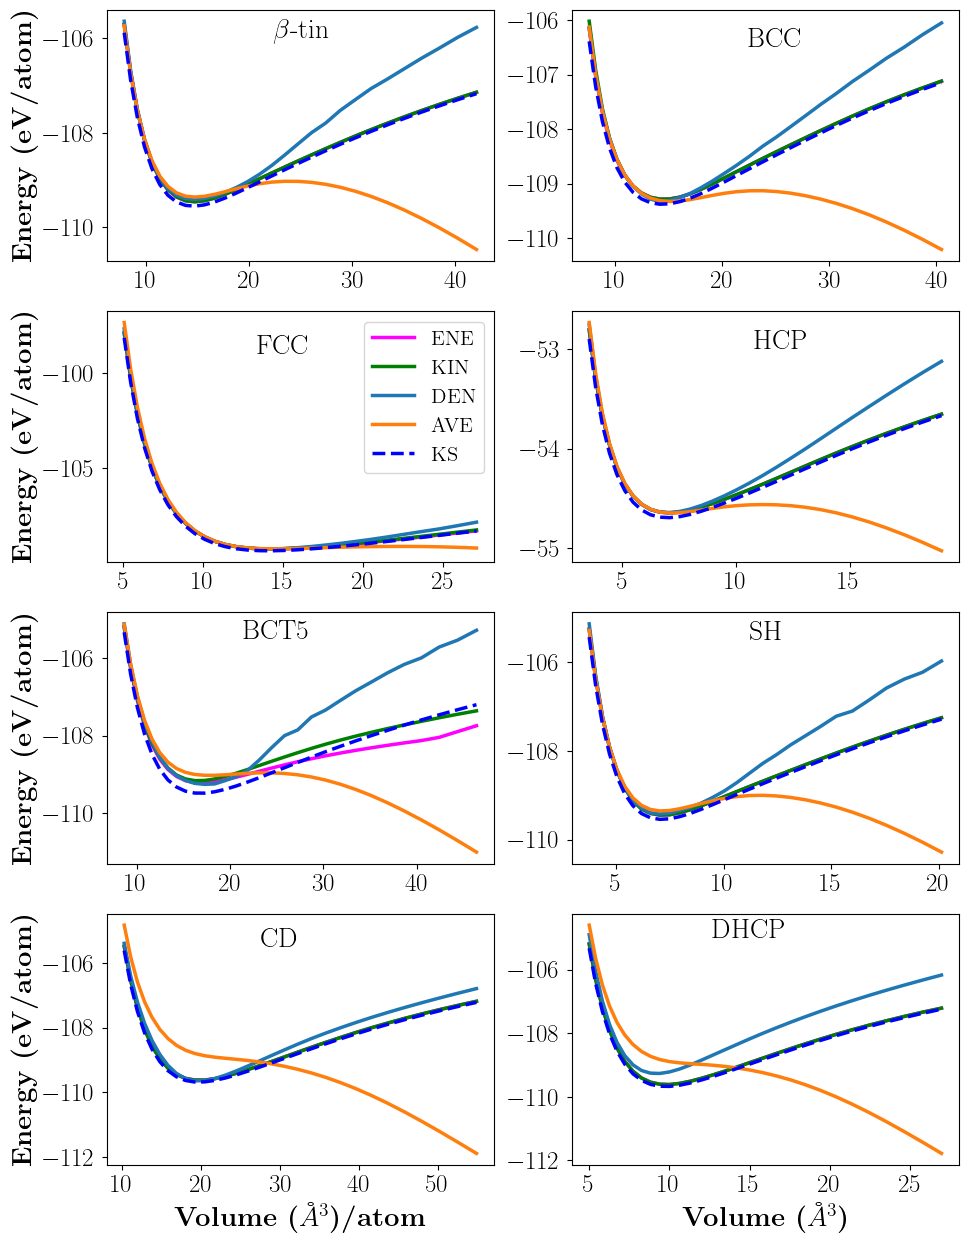

In [57]:
fig, axs = plt.subplots(4,2, figsize=(11,15))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_energy_te)*27.211407/4, linewidth=2.5, color='magenta', label=r'ENE')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_energy_ke)*27.211407/4, linewidth=2.5, color='green', label=r'KIN')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_energy_den)*27.211407/4, linewidth=2.5, label=r'DEN')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(E_WT_Btin)*27.211407/4, linewidth=2.5, label=r'AVE')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Ks_Btin_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_te)*27.211407/2, linewidth=2.5, color='magenta', label=r'ENE')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_ke)*27.211407/2, linewidth=2.5, color='green', label=r'KIN')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_den)*27.211407/2, linewidth=2.5, label=r'DEN')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(E_WT_bcc)*27.211407/2, linewidth=2.5,label=r'AVE')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Ks_bcc_TE)*27.211407/4, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_energy_te)*27.211407/4, linewidth=2.5, color='magenta', label=r'ENE')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_energy_ke)*27.211407/4, linewidth=2.5, color='green', label=r'KIN')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_energy_den)*27.211407/4, linewidth=2.5, label=r'DEN')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(E_WT_fcc)*27.211407/4, linewidth=2.5,label=r'AVE')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Ks_fcc_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_energy_te)*27.211407/4, linewidth=2.5, color='magenta')
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_energy_ke)*27.211407/4, linewidth=2.5, color='green')
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_energy_den)*27.211407/4, linewidth=2.5)
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(E_WT_hcp)*27.211407/4, linewidth=2.5)
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Ks_hcp_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')

im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_energy_te)*27.211407/4, linewidth=2.5, color='magenta')
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_energy_ke)*27.211407/4, linewidth=2.5, color='green')
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_energy_den)*27.211407/4, linewidth=2.5)
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(E_WT_bct5)*27.211407/4, linewidth=2.5)
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Ks_bct5_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')


im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_energy_te)*27.211407/1, linewidth=2.5, color='magenta')
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_energy_ke)*27.211407/1, linewidth=2.5, color='green')
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_energy_den)*27.211407/1, linewidth=2.5)
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(E_WT_sh)*27.211407/1, linewidth=2.5)
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Ks_sh_TE)*27.211407/2, linewidth=2.5, linestyle='dashed', color='blue')

im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_te)*27.211407/8, linewidth=2.5, color='magenta')
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_ke)*27.211407/8, linewidth=2.5, color='green')
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_den)*27.211407/8, linewidth=2.5)
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(E_WT_8cd)*27.211407/8, linewidth=2.5)
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Ks_8cd_TE)*27.211407/16, linewidth=2.5, linestyle='dashed', color='blue')

im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_energy_te)*27.211407/4, linewidth=2.5, color='magenta')
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_energy_ke)*27.211407/4, linewidth=2.5, color='green')
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_energy_den)*27.211407/4, linewidth=2.5)
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(E_WT_dhcp)*27.211407/4, linewidth=2.5)
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Ks_dhcp_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')




# axs[0,0].set_title(r'$\beta$-tin', fontsize=18)
# axs[0,1].set_title(r'BCC', fontsize=18)
# axs[1,0].set_title(r'FCC', fontsize=18)
# axs[1,1].set_title(r'HCP', fontsize=18)
# axs[2,0].set_title(r'BCT5', fontsize=18)
# axs[2,1].set_title(r'SH', fontsize=18)
# axs[3,0].set_title(r'CD', fontsize=18)
# axs[3,1].set_title(r'DHCP', fontsize=18)

# axs[0,0].annotate(r'$\beta$-tin', xy=(2,1), xytext=(20,20))
# axs[0,1].annotate(r'BCC', xy=(2,1), xytext=(3, 1.5))
# axs[1,0].annotate(r'FCC', xy=(2,1), xytext=(3, 1.5))
# axs[1,1].annotate(r'HCP', xy=(2,1), xytext=(3, 1.5))
# axs[2,0].annotate(r'BCT5', xy=(2,1), xytext=(3, 1.5))
# axs[2,1].annotate(r'SH', xy=(2,1), xytext=(3, 1.5))
# axs[3,0].annotate(r'CD', xy=(2,1), xytext=(3, 1.5))
# axs[3,1].annotate(r'DHCP', xy=(2,1), xytext=(3, 1.5))
axs[0, 0].annotate(r'$\beta$-tin', xy=(25, -106), ha='center', fontsize=20)
axs[0, 1].annotate('BCC', xy=(25, -106.5), ha='center', fontsize=20)
axs[1, 0].annotate('FCC', xy=(15, -99), ha='center', fontsize=20)
axs[1, 1].annotate('HCP', xy=(12, -53), ha='center', fontsize=20)
axs[2, 0].annotate('BCT5', xy=(25, -105.5), ha='center', fontsize=20)
axs[2, 1].annotate('SH', xy=(12, -105.5), ha='center', fontsize=20)
axs[3, 0].annotate('CD', xy=(30,-105.5), ha='center', fontsize=20)
axs[3, 1].annotate('DHCP', xy=(15, -105), ha='center', fontsize=20)


axs[0,0].tick_params(axis='both', labelsize=18)
axs[0,1].tick_params(axis='both', labelsize=18)
axs[1,0].tick_params(axis='both', labelsize=18)
axs[1,1].tick_params(axis='both', labelsize=18)
axs[2,0].tick_params(axis='both', labelsize=18)
axs[2,1].tick_params(axis='both', labelsize=18)
axs[3,0].tick_params(axis='both', labelsize=18)
axs[3,1].tick_params(axis='both', labelsize=18)

axs[3,0].set_xlabel(r'\textbf{Volume ($\AA^{3}$)/atom}', fontsize=20)
axs[3,1].set_xlabel(r'\textbf{Volume ($\AA^{3}$)}', fontsize=20)
axs[0,0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=20)
axs[1,0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=20)
axs[3,0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=20)
axs[2,0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=20)
# axs[2,0].set_xlabel('Volume ($\AA^{3}$)')
# axs[2,0].set_ylabel('Energy (eV/atom)')
# axs[0].legend(['Real', 'Predicted'])
axs[1,0].legend(fontsize="15")
plt.savefig("EOS.png", bbox_inches='tight', dpi=200)#format="png", dpi=resolution_value)

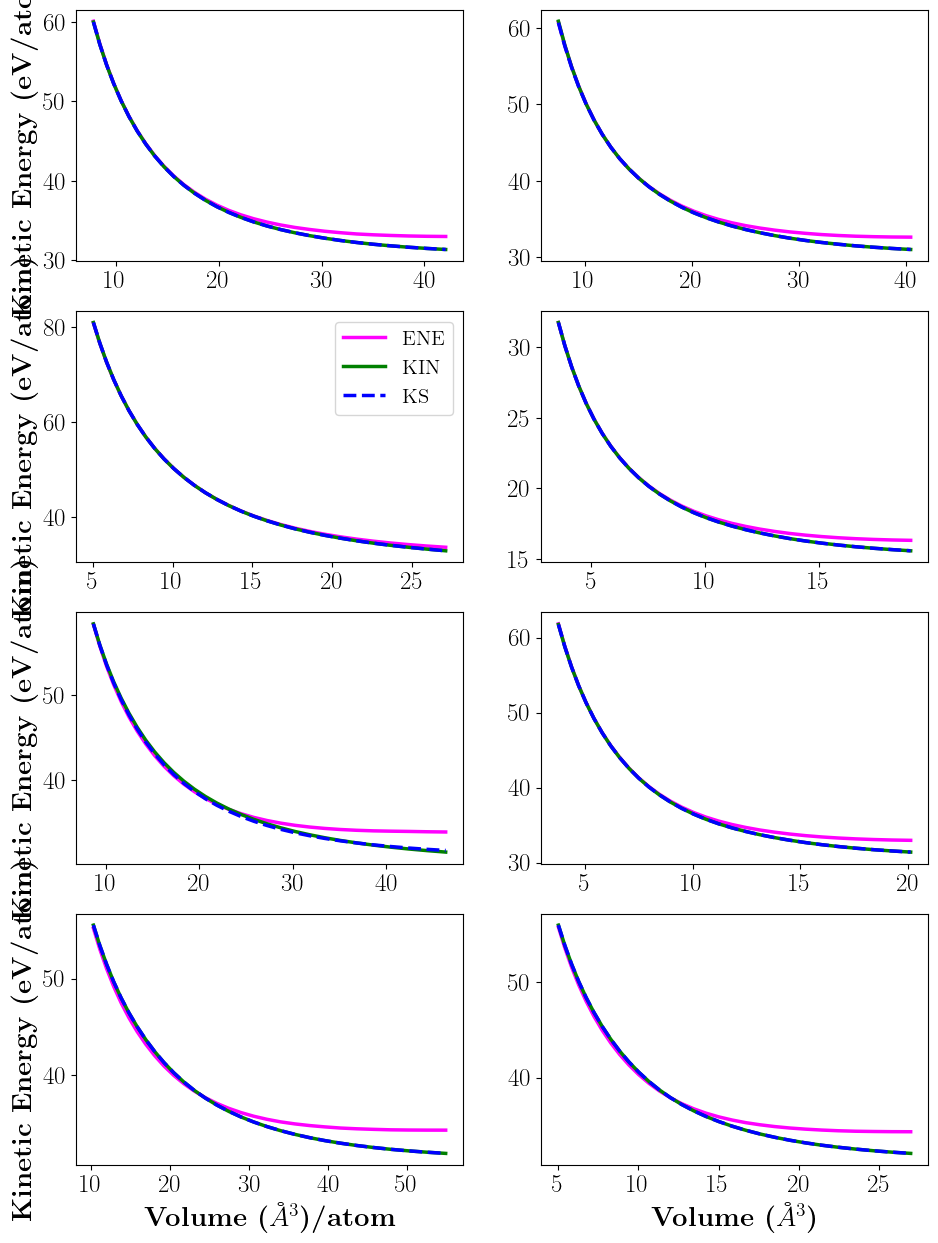

In [38]:
fig, axs = plt.subplots(4,2, figsize=(11,15))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_kin_te)*27.211407/4, linewidth=2.5, color='magenta', label=r'ENE')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_kin_ke)*27.211407/4, linewidth=2.5, color='green', label=r'KIN')
# im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_kin_den)*27.211407/4, linewidth=2.5, label=r'DEN')
# im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(KE_WT_Btin)*27.211407/4, linewidth=2.5, label=r'AVE')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Ks_Btin_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_kin_te)*27.211407/2, linewidth=2.5, color='magenta', label=r'ENE')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_kin_ke)*27.211407/2, linewidth=2.5, color='green', label=r'KIN')
# im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_kin_den)*27.211407/2, linewidth=2.5, label=r'DEN')
# im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(KE_WT_bcc)*27.211407/2, linewidth=2.5,label=r'AVE')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Ks_bcc_KE)*27.211407/4, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_kin_te)*27.211407/4, linewidth=2.5, color='magenta', label=r'ENE')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_kin_ke)*27.211407/4, linewidth=2.5, color='green', label=r'KIN')
# im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_kin_den)*27.211407/4, linewidth=2.5, label=r'DEN')
# im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(KE_WT_fcc)*27.211407/4, linewidth=2.5,label=r'AVE')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Ks_fcc_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_kin_te)*27.211407/4, linewidth=2.5, color='magenta')
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_kin_ke)*27.211407/4, linewidth=2.5, color='green')
# im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_kin_den)*27.211407/4, linewidth=2.5)
# im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(KE_WT_hcp)*27.211407/4, linewidth=2.5)
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Ks_hcp_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')

im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_kin_te)*27.211407/4, linewidth=2.5, color='magenta')
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_kin_ke)*27.211407/4, linewidth=2.5, color='green')
# im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_kin_den)*27.211407/4, linewidth=2.5)
# im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(KE_WT_bct5)*27.211407/4, linewidth=2.5)
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Ks_bct5_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')


im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_kin_te)*27.211407/1, linewidth=2.5, color='magenta')
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_kin_ke)*27.211407/1, linewidth=2.5, color='green')
# im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_kin_den)*27.211407/1, linewidth=2.5)
# im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(KE_WT_sh)*27.211407/1, linewidth=2.5)
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Ks_sh_KE)*27.211407/2, linewidth=2.5, linestyle='dashed', color='blue')

im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_kin_te)*27.211407/8, linewidth=2.5, color='magenta')
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_kin_ke)*27.211407/8, linewidth=2.5, color='green')
# im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_kin_den)*27.211407/8, linewidth=2.5)
# im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(KE_WT_8cd)*27.211407/8, linewidth=2.5)
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Ks_8cd_KE)*27.211407/16, linewidth=2.5, linestyle='dashed', color='blue')

im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_kin_te)*27.211407/4, linewidth=2.5, color='magenta')
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_kin_ke)*27.211407/4, linewidth=2.5, color='green')
# im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_kin_den)*27.211407/4, linewidth=2.5)
# im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(KE_WT_dhcp)*27.211407/4, linewidth=2.5)
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Ks_dhcp_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')

axs[0, 0].annotate(r'$\beta$-tin', xy=(25, -106), ha='center', fontsize=20)
axs[0, 1].annotate('BCC', xy=(25, -106.5), ha='center', fontsize=20)
axs[1, 0].annotate('FCC', xy=(15, -99), ha='center', fontsize=20)
axs[1, 1].annotate('HCP', xy=(12, -53), ha='center', fontsize=20)
axs[2, 0].annotate('BCT5', xy=(25, -105.5), ha='center', fontsize=20)
axs[2, 1].annotate('SH', xy=(12, -105.5), ha='center', fontsize=20)
axs[3, 0].annotate('CD', xy=(30,-105.5), ha='center', fontsize=20)
axs[3, 1].annotate('DHCP', xy=(15, -105), ha='center', fontsize=20)


axs[0,0].tick_params(axis='both', labelsize=18)
axs[0,1].tick_params(axis='both', labelsize=18)
axs[1,0].tick_params(axis='both', labelsize=18)
axs[1,1].tick_params(axis='both', labelsize=18)
axs[2,0].tick_params(axis='both', labelsize=18)
axs[2,1].tick_params(axis='both', labelsize=18)
axs[3,0].tick_params(axis='both', labelsize=18)
axs[3,1].tick_params(axis='both', labelsize=18)

axs[3,0].set_xlabel(r'\textbf{Volume ($\AA^{3}$)/atom}', fontsize=20)
axs[3,1].set_xlabel(r'\textbf{Volume ($\AA^{3}$)}', fontsize=20)
axs[0,0].set_ylabel(r'\textbf{Kinetic Energy (eV/atom)}', fontsize=20)
axs[1,0].set_ylabel(r'\textbf{Kinetic Energy (eV/atom)}', fontsize=20)
axs[3,0].set_ylabel(r'\textbf{Kinetic Energy (eV/atom)}', fontsize=20)
axs[2,0].set_ylabel(r'\textbf{Kinetic Energy (eV/atom)}', fontsize=20)
# axs[2,0].set_xlabel('Volume ($\AA^{3}$)')
# axs[2,0].set_ylabel('Energy (eV/atom)')
# axs[0].legend(['Real', 'Predicted'])
axs[1,0].legend(fontsize="15")
plt.savefig("EOS.png", bbox_inches='tight', dpi=200)#format="png", dpi=resolution_value)

# RMSD of the total energy

In [50]:
import math
from sklearn.metrics import r2_score, mean_squared_error

#Total energy
y_ks_Btin = np.asarray(Ks_Btin_TE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_energy_te)*27.211407/4
R_aiwt_Btin_te =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_te = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_TE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_energy_te)*27.211407/4
R_aiwt_fcc_te =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_te = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_TE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_energy_te)*27.211407/2
R_aiwt_bcc_te =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_te = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_TE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_energy_te)*27.211407/8
R_aiwt_8cd_te =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_te = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_TE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_energy_te)*27.211407/4
R_aiwt_dhcp_te =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_te = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_TE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_energy_te)*27.211407/2
R_aiwt_hcp_te =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_te = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_TE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_energy_te)*27.211407/4
R_aiwt_bct5_te =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_te = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_TE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_energy_te)*27.211407/1
R_aiwt_sh_te =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_te = np.corrcoef(y_ks_sh, y_cwt_sh)

#Kinetic energy
y_ks_Btin = np.asarray(Ks_Btin_TE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_energy_ke)*27.211407/4
R_aiwt_Btin_ke =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_ke = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_TE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_energy_ke)*27.211407/4
R_aiwt_fcc_ke =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_ke = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_TE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_energy_ke)*27.211407/2
R_aiwt_bcc_ke =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_ke = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_TE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_energy_ke)*27.211407/8
R_aiwt_8cd_ke =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_ke = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_TE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_energy_ke)*27.211407/4
R_aiwt_dhcp_ke =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_ke = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_TE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_energy_ke)*27.211407/2
R_aiwt_hcp_ke =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_ke = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_TE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_energy_ke)*27.211407/4
R_aiwt_bct5_ke =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_ke = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_TE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_energy_ke)*27.211407/1
R_aiwt_sh_ke =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_ke = np.corrcoef(y_ks_sh, y_cwt_sh)

#Density
y_ks_dhcp = np.asarray(Ks_dhcp_TE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_energy_den)*27.211407/4
R_aiwt_dhcp_den =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_den = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_TE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_energy_den)*27.211407/2
R_aiwt_hcp_den =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_den = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_TE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_energy_den)*27.211407/4
R_aiwt_bct5_den =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_den = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_TE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_energy_den)*27.211407/1
R_aiwt_sh_den =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_den = np.corrcoef(y_ks_sh, y_cwt_sh)

y_ks_bcc = np.asarray(Ks_bcc_TE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_energy_den)*27.211407/2
R_aiwt_bcc_den =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_wt_bcc_den = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_fcc = np.asarray(Ks_fcc_TE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_energy_den)*27.211407/4
R_aiwt_fcc_den =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_wt_fcc_den = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_8cd = np.asarray(Ks_8cd_TE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_energy_den)*27.211407/8
R_aiwt_8cd_den =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_wt_8cd_den = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_Btin = np.asarray(Ks_Btin_TE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_energy_den)*27.211407/4
R_aiwt_Btin_den =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_wt_Btin_den = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_Btin = np.asarray(Ks_Btin_TE)*27.211407/8
y_wt_Btin = np.asarray(E_WT_Btin)*27.211407/4
R_wt_Btin_den =  mean_squared_error(y_ks_Btin, y_wt_Btin) 
corr_wt_Btin_den = np.corrcoef(y_ks_Btin, y_wt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_TE)*27.211407/8
y_wt_fcc = np.asarray(E_WT_fcc)*27.211407/4
R_wt_fcc_den =  mean_squared_error(y_ks_fcc, y_wt_fcc) 
corr_wt_fcc_den = np.corrcoef(y_ks_fcc, y_wt_fcc)



y_ks_bcc = np.asarray(Ks_bcc_TE)*27.211407/4
y_wt_bcc = np.asarray(E_WT_bcc)*27.211407/2
R_wt_bcc_den =  mean_squared_error(y_ks_bcc, y_wt_bcc) 
corr_wt_bcc_den = np.corrcoef(y_ks_Btin, y_wt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_TE)*27.211407/16
y_wt_8cd = np.asarray(E_WT_8cd)*27.211407/8
R_wt_8cd_den =  mean_squared_error(y_ks_8cd, y_wt_8cd) 
corr_wt_8cd_den = np.corrcoef(y_ks_8cd, y_wt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_TE)*27.211407/8
y_wt_dhcp = np.asarray(E_WT_dhcp)*27.211407/4
R_wt_dhcp_den =  mean_squared_error(y_ks_dhcp, y_wt_dhcp) 
corr_wt_dhcp_den = np.corrcoef(y_ks_dhcp, y_wt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_TE)*27.211407/4
y_wt_hcp = np.asarray(E_WT_hcp)*27.211407/2
R_wt_hcp_den =  mean_squared_error(y_ks_hcp, y_wt_hcp) 
corr_wt_hcp_den = np.corrcoef(y_ks_hcp, y_wt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_TE)*27.211407/8
y_wt_bct5 = np.asarray(E_WT_bct5)*27.211407/4
R_wt_bct5_den =  mean_squared_error(y_ks_bct5, y_wt_bct5) 
corr_wt_bct5_den = np.corrcoef(y_ks_bct5, y_wt_bct5)

y_ks_sh = np.asarray(Ks_sh_TE)*27.211407/2
y_wt_sh = np.asarray(E_WT_sh)*27.211407/1
R_wt_sh_den =  mean_squared_error(y_ks_sh, y_wt_sh) 
corr_wt_sh_den = np.corrcoef(y_ks_sh, y_wt_sh)

In [51]:
from tabulate import tabulate
## Energies wrt KS bcc energies
data = [
    ["Btin",R_aiwt_Btin_ke, R_aiwt_Btin_te, R_aiwt_Btin_den, R_wt_Btin_den],
    ["bcc", R_aiwt_bcc_ke, R_aiwt_bcc_te, R_aiwt_bcc_den, R_wt_bcc_den],
    ["fcc", R_aiwt_fcc_ke, R_aiwt_fcc_te, R_aiwt_fcc_den, R_wt_fcc_den],
    ["hcp", R_aiwt_hcp_ke, R_aiwt_hcp_te, R_aiwt_hcp_den, R_wt_hcp_den],
    ["bct5", R_aiwt_bct5_ke, R_aiwt_bct5_te, R_aiwt_bct5_den, R_wt_bct5_den],
    ["sh", R_aiwt_sh_ke, R_aiwt_sh_te, R_aiwt_sh_den, R_wt_sh_den],
    ["cd", R_aiwt_8cd_ke, R_aiwt_8cd_te, R_aiwt_8cd_den, R_wt_8cd_den],
    ["dhcp", R_aiwt_dhcp_ke, R_aiwt_dhcp_te, R_aiwt_dhcp_den, R_wt_dhcp_den],

]

table = tabulate(data, headers=["Total energy","RMSE rho0_KIN","RMSE rho0_TE","RMSE rho0_DEN", "RMSE N/V"], tablefmt="grid")

print(table)

+----------------+-----------------+----------------+-----------------+------------+
| Total energy   |   RMSE rho0_KIN |   RMSE rho0_TE |   RMSE rho0_DEN |   RMSE N/V |
+================+=================+================+=================+============+
| Btin           |      0.0078538  |     0.0075979  |       0.394882  |   1.43281  |
+----------------+-----------------+----------------+-----------------+------------+
| bcc            |      0.0156961  |     0.0095025  |       0.20899   |   1.35568  |
+----------------+-----------------+----------------+-----------------+------------+
| fcc            |      0.01834    |     0.0155349  |       0.0640286 |   0.150755 |
+----------------+-----------------+----------------+-----------------+------------+
| hcp            |      0.0097169  |     0.00927087 |       0.195948  |   0.986523 |
+----------------+-----------------+----------------+-----------------+------------+
| bct5           |      0.0595215  |     0.0889275  |       0.916

In [45]:
# RMSD of the Kinetic energy

In [52]:
import math
from sklearn.metrics import r2_score, mean_squared_error
# Kinetic energy RMSD
# rho0 from Total energy
y_ks_Btin = np.asarray(Ks_Btin_KE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_kin_te)*27.211407/4
R_aiwt_Btin_te =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_te = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_KE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_kin_te)*27.211407/4
R_aiwt_fcc_te =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_te = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_KE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_kin_te)*27.211407/2
R_aiwt_bcc_te =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_te = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_KE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_kin_te)*27.211407/8
R_aiwt_8cd_te =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_te = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_KE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_kin_te)*27.211407/4
R_aiwt_dhcp_te =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_te = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_KE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_kin_te)*27.211407/2
R_aiwt_hcp_te =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_te = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_KE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_kin_te)*27.211407/4
R_aiwt_bct5_te =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_te = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_KE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_kin_te)*27.211407/1
R_aiwt_sh_te =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_te = np.corrcoef(y_ks_sh, y_cwt_sh)

# rho0 from kinetic energy
y_ks_Btin = np.asarray(Ks_Btin_KE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_kin_ke)*27.211407/4
R_aiwt_Btin_ke =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_ke = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_KE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_kin_ke)*27.211407/4
R_aiwt_fcc_ke =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_ke = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_KE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_kin_ke)*27.211407/2
R_aiwt_bcc_ke =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_ke = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_KE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_kin_ke)*27.211407/8
R_aiwt_8cd_ke =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_ke = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_KE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_kin_ke)*27.211407/4
R_aiwt_dhcp_ke =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_ke = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_KE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_kin_ke)*27.211407/2
R_aiwt_hcp_ke =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_ke = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_KE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_kin_ke)*27.211407/4
R_aiwt_bct5_ke =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_ke = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_KE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_kin_ke)*27.211407/1
R_aiwt_sh_ke =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_ke = np.corrcoef(y_ks_sh, y_cwt_sh)

#rho0 from Density
y_ks_dhcp = np.asarray(Ks_dhcp_KE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_kin_den)*27.211407/4
R_aiwt_dhcp_den =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_den = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_KE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_kin_den)*27.211407/2
R_aiwt_hcp_den =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_den = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_KE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_kin_den)*27.211407/4
R_aiwt_bct5_den =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_den = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_KE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_kin_den)*27.211407/1
R_aiwt_sh_den =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_den = np.corrcoef(y_ks_sh, y_cwt_sh)

y_ks_Btin = np.asarray(Ks_Btin_KE)*27.211407/8
y_wt_Btin = np.asarray(KE_WT_Btin)*27.211407/4
R_wt_Btin_den =  mean_squared_error(y_ks_Btin, y_wt_Btin) 
corr_wt_Btin_den = np.corrcoef(y_ks_Btin, y_wt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_KE)*27.211407/8
y_wt_fcc = np.asarray(KE_WT_fcc)*27.211407/4
R_wt_fcc_den =  mean_squared_error(y_ks_fcc, y_wt_fcc) 
corr_wt_fcc_den = np.corrcoef(y_ks_fcc, y_wt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_KE)*27.211407/4
y_wt_bcc = np.asarray(KE_WT_bcc)*27.211407/2
R_wt_bcc_den =  mean_squared_error(y_ks_bcc, y_wt_bcc) 
corr_wt_bcc_den = np.corrcoef(y_ks_Btin, y_wt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_KE)*27.211407/16
y_wt_8cd = np.asarray(KE_WT_8cd)*27.211407/8
R_wt_8cd_den =  mean_squared_error(y_ks_8cd, y_wt_8cd) 
corr_wt_8cd_den = np.corrcoef(y_ks_8cd, y_wt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_KE)*27.211407/8
y_wt_dhcp = np.asarray(KE_WT_dhcp)*27.211407/4
R_wt_dhcp_den =  mean_squared_error(y_ks_dhcp, y_wt_dhcp) 
corr_wt_dhcp_den = np.corrcoef(y_ks_dhcp, y_wt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_KE)*27.211407/4
y_wt_hcp = np.asarray(KE_WT_hcp)*27.211407/2
R_wt_hcp_den =  mean_squared_error(y_ks_hcp, y_wt_hcp) 
corr_wt_hcp_den = np.corrcoef(y_ks_hcp, y_wt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_KE)*27.211407/8
y_wt_bct5 = np.asarray(KE_WT_bct5)*27.211407/4
R_wt_bct5_den =  mean_squared_error(y_ks_bct5, y_wt_bct5) 
corr_wt_bct5_den = np.corrcoef(y_ks_bct5, y_wt_bct5)

y_ks_sh = np.asarray(Ks_sh_KE)*27.211407/2
y_wt_sh = np.asarray(KE_WT_sh)*27.211407/1
R_wt_sh_den =  mean_squared_error(y_ks_sh, y_wt_sh) 
corr_wt_sh_den = np.corrcoef(y_ks_sh, y_wt_sh)

y_ks_Btin = np.asarray(Ks_Btin_KE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_kin_den)*27.211407/4
R_aiwt_Btin_den =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_den = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_KE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_kin_den)*27.211407/4
R_aiwt_fcc_den =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_den = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_KE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_kin_den)*27.211407/2
R_aiwt_bcc_den =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_den = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_KE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_kin_den)*27.211407/8
R_aiwt_8cd_den =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_den = np.corrcoef(y_ks_8cd, y_cwt_8cd)

In [54]:
from tabulate import tabulate
## Energies wrt KS bcc energies
data = [
    ["Btin",R_aiwt_Btin_ke, R_aiwt_Btin_te, R_aiwt_Btin_den, R_wt_Btin_den],
    ["bcc", R_aiwt_bcc_ke,  R_aiwt_bcc_te,  R_aiwt_bcc_den,  R_wt_bcc_den],
    ["fcc", R_aiwt_fcc_ke,  R_aiwt_fcc_te,  R_aiwt_fcc_den,  R_wt_fcc_den],
    ["hcp", R_aiwt_hcp_ke,  R_aiwt_hcp_te,  R_aiwt_hcp_den,  R_wt_hcp_den],
    ["bct5", R_aiwt_bct5_ke,R_aiwt_bct5_te, R_aiwt_bct5_den, R_wt_bct5_den],
    ["sh", R_aiwt_sh_ke,    R_aiwt_sh_te,   R_aiwt_sh_den,   R_wt_sh_den],
    ["cd", R_aiwt_8cd_ke,   R_aiwt_8cd_te,  R_aiwt_8cd_den,  R_wt_8cd_den],
    ["dhcp", R_aiwt_dhcp_ke,R_aiwt_dhcp_te, R_aiwt_dhcp_den, R_wt_dhcp_den],
]

table = tabulate(data, headers=["Kinetic energy","RMSE rho0_KIN","RMSE rho0_TE","RMSE rho0_DEN", "RMSE N\V"], tablefmt="grid")
print(tabulate(data, tablefmt="latex"))

# print(table)

\begin{tabular}{lrrrr}
\hline
 Btin & 3.29724e-06 & 0.504194  & 0.113271  & 1.57739  \\
 bcc  & 0.00225449  & 0.465068  & 0.15179   & 1.65858  \\
 fcc  & 5.32459e-08 & 0.0686338 & 0.0166964 & 0.225314 \\
 hcp  & 1.69276e-05 & 0.379843  & 0.106615  & 1.40339  \\
 bct5 & 0.0335295   & 0.922799  & 0.144727  & 1.698    \\
 sh   & 3.3871e-06  & 0.453269  & 0.0961798 & 1.42585  \\
 cd   & 4.2684e-16  & 1.25367   & 1.10386   & 2.0057   \\
 dhcp & 2.81462e-16 & 1.05572   & 0.676038  & 1.77589  \\
\hline
\end{tabular}


In [ ]:
## N/V values

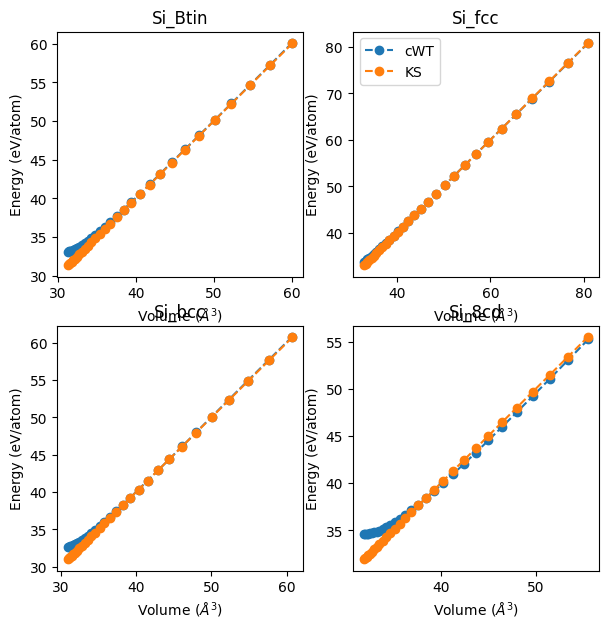

In [37]:
fig, axs = plt.subplots(2,2, figsize=(7,7))
im0 = axs[0,0].plot(np.asarray(Ks_Btin)*27.211407/8,np.asarray(Cwt_Btin_kin_ke)*27.211407/4, 'o--')
im0 = axs[0,0].plot(np.asarray(Ks_Btin)*27.211407/8,np.asarray(Ks_Btin)*27.211407/8, 'o--')
im1 = axs[0,1].plot(np.asarray(Ks_fcc)*27.211407/8,np.asarray(Cwt_fcc_kin_ke)*27.211407/4, 'o--')
im1 = axs[0,1].plot(np.asarray(Ks_fcc)*27.211407/8,np.asarray(Ks_fcc)*27.211407/8, 'o--')
im2 = axs[1,0].plot(np.asarray(Ks_bcc)*27.211407/4,np.asarray(Cwt_bcc_kin_ke)*27.211407/2, 'o--')
im2 = axs[1,0].plot(np.asarray(Ks_bcc)*27.211407/4,np.asarray(Ks_bcc)*27.211407/4, 'o--')
im3 = axs[1,1].plot(np.asarray(Ks_8cd)*27.211407/16,np.asarray(Cwt_8cd_kin_ke)*27.211407/8, 'o--')
im3 = axs[1,1].plot(np.asarray(Ks_8cd)*27.211407/16,np.asarray(Ks_8cd)*27.211407/16, 'o--')
axs[0,0].set_title('Si_Btin')
axs[0,1].set_title('Si_fcc')
axs[1,0].set_title('Si_bcc')
axs[1,1].set_title('Si_8cd')
# axs[2,1].set_title('Li')

axs[0,0].set_xlabel('Volume ($\AA^{3}$)')
axs[0,0].set_ylabel('Energy (eV/atom)')
axs[0,1].set_xlabel('Volume ($\AA^{3}$)')
axs[0,1].set_ylabel('Energy (eV/atom)')
axs[1,0].set_xlabel('Volume ($\AA^{3}$)')
axs[1,0].set_ylabel('Energy (eV/atom)')
axs[1,1].set_xlabel('Volume ($\AA^{3}$)')
axs[1,1].set_ylabel('Energy (eV/atom)')
# axs[2,0].set_xlabel('Volume ($\AA^{3}$)')
# axs[2,0].set_ylabel('Energy (eV/atom)')
# axs[0].legend(['Real', 'Predicted'])
axs[0,1].legend(['cWT', 'KS'])

In [30]:
import cWT_rho0

In [32]:
r = np.linspace(0.8, 1.4, 30)
rr = [r[index_Cwt_Btin], r[index_Cwt_fcc] , r[index_Cwt_bcc] , r[index_Cwt_8cd] ]

In [42]:
rho0 = np.linspace(0.015,0.1,20)
Phases = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_8cd']
Volume = {}
Cwt_energy = {}

for i,p in enumerate(Phases):
    volume = []
    cwt_energy = []
    for j in rho0:
        print(Phases[i])
        dictionary = {
            'Si_Btin': {'structure': 'diamond', 'charge': '4'}, 
            'Si_fcc': {'structure': 'fcc', 'lattice': '3.405', 'charge': '4'},
            'Si_bcc': {'structure': 'bcc', 'lattice': '3.09', 'charge': '4'},
            'Si_8cd': {'structure': 'diamond', 'lattice': '5.43', 'charge': '4'},
            'Si_7cd': {'structure': 'diamond', 'lattice': '5.43', 'charge': '4'},
            'Li': {'structure': 'bcc', 'lattice': '3.51', 'charge': '1'},

        }
        if Phases[i] == 'Si_Btin':
                ions = crystal('Si',[(0,0,0)],spacegroup=141,cellpar = [4.81,4.81,2.65, 90,90,90])
        else:
            ions = bulk('Si', dictionary[Phases[i]]['structure'], a=float(dictionary[Phases[i]]['lattice']), cubic=True)


        energy, vol= cWT_rho0.get_energy(material=ions, PP_list=PP_list, rho0=j, d=rr[i])
        cwt_energy.append(energy)
        volume.append(vol)
    Volume[p] = volume
    Cwt_energy[p] = cwt_energy

Si_Btin
init_material Cell([4.81, 4.81, 2.65])
Atoms(symbols='Si4', pbc=True, cell=[4.81, 4.81, 2.65], spacegroup_kinds=...)
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.518693706001E+01     -1.518694E+01   2.802487E+00    1       1       6.701946E-03    
1       -1.626779474207E+01     -1.080858E+00   1.982107E-01    10      2       2.849603E-02    
2       -1.629001946763E+01     -2.222473E-02   1.614426E-02    6       1       3.880596E-02    
3       -1.629313258876E+01     -3.113121E-03   1.044401E-03    9       1       5.572200E-02    
4       -1.629326390595E+01     -1.313172E-04   7.776554E-05    8       1       6.731892E-02    
5       -1.629327981173E+01     -1.590578E-05   6.556351E-06    10      1       8.368802E-02    
6       -1.629328046599E+01     -6.542625E-07   5.732608E-07    7       1       1.019440E-01    
#### Density Optimizati

2       -1.605065068701E+01     -8.954189E-03   9.362057E-03    4       1       2.475977E-02    
3       -1.605149206636E+01     -8.413793E-04   7.195617E-04    5       1       3.661370E-02    
4       -1.605152777758E+01     -3.571122E-05   6.617497E-05    4       1       4.804468E-02    
5       -1.605153757332E+01     -9.795735E-06   4.141897E-06    7       1       6.147194E-02    
6       -1.605153792741E+01     -3.540892E-07   3.943116E-07    6       1       7.467866E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.36678479781060014
Chemical potential (eV)  : 9.980722721093729
Si_Btin
init_material Cell([4.81, 4.81, 2.65])
Atoms(symbols='Si4', pbc=True, cell=[4.81, 4.81, 2.65], spacegroup_kinds=...)
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.518693706001E+01     -1.518694E+01   2.802487E+00    1       1       6.01

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.37224928993867135
Chemical potential (eV)  : 10.129419125817792
Si_Btin
init_material Cell([4.81, 4.81, 2.65])
Atoms(symbols='Si4', pbc=True, cell=[4.81, 4.81, 2.65], spacegroup_kinds=...)
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.518693706001E+01     -1.518694E+01   2.802487E+00    1       1       6.757021E-03    
1       -1.597266823902E+01     -7.857312E-01   1.807153E-01    6       2       2.342892E-02    
2       -1.598230381591E+01     -9.635577E-03   1.142764E-02    4       1       3.083992E-02    
3       -1.598336090685E+01     -1.057091E-03   7.054242E-04    5       1       4.099894E-02    
4       -1.598343732626E+01     -7.641941E-05   6.064973E-05    6       1       5.065513E-02    
5       -1.598344193535E+01     -4.609088E-06   6.006058E-06    5       1       6.1

1       -1.608431164688E+01     -6.751703E-01   2.185378E-01    7       2       1.535106E-02    
2       -1.609764495787E+01     -1.333331E-02   1.667319E-02    4       1       2.220511E-02    
3       -1.609953109975E+01     -1.886142E-03   6.632050E-04    6       1       3.473210E-02    
4       -1.609971616981E+01     -1.850701E-04   4.663509E-05    8       1       4.614925E-02    
5       -1.609972223090E+01     -6.061084E-06   4.499223E-06    5       1       5.284905E-02    
6       -1.609972278946E+01     -5.585613E-07   2.481587E-07    7       1       6.257820E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.38863187580279474
Chemical potential (eV)  : 10.575211993843794
Si_fcc
init_material Cell([3.405, 3.405, 3.405])
Atoms(symbols='Si4', pbc=True, cell=[3.405, 3.405, 3.405])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0  

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3928217367551422
Chemical potential (eV)  : 10.689223917606546
Si_fcc
init_material Cell([3.405, 3.405, 3.405])
Atoms(symbols='Si4', pbc=True, cell=[3.405, 3.405, 3.405])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.540914137186E+01     -1.540914E+01   2.643513E+00    1       1       4.754066E-03    
1       -1.602987279071E+01     -6.207314E-01   1.831902E-01    5       1       1.202321E-02    
2       -1.605432114684E+01     -2.444836E-02   9.852682E-03    7       1       2.008510E-02    
3       -1.605473420473E+01     -4.130579E-04   4.677001E-04    3       1       2.602696E-02    
4       -1.605478095238E+01     -4.674765E-05   3.163182E-05    6       1       3.677225E-02    
5       -1.605478420470E+01     -3.252322E-06   2.796550E-06    5       1       4.506016E-02    
6   

5       -1.604318301739E+01     -7.760697E-07   1.260822E-06    3       1       7.854700E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3935623905911075
Chemical potential (eV)  : 10.709378135047425
Si_fcc
init_material Cell([3.405, 3.405, 3.405])
Atoms(symbols='Si4', pbc=True, cell=[3.405, 3.405, 3.405])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.540914137186E+01     -1.540914E+01   2.643513E+00    1       1       4.818201E-03    
1       -1.601827132938E+01     -6.091300E-01   1.808069E-01    4       1       1.160908E-02    
2       -1.604135321502E+01     -2.308189E-02   4.411819E-03    7       1       1.983404E-02    
3       -1.604181321772E+01     -4.600027E-04   2.240902E-04    5       1       2.861214E-02    
4       -1.604183956819E+01     -2.635047E-05   1.354222E-05    6       1       3.836894E-02    
5   

3       -8.035131199507E+00     -8.094450E-04   7.041031E-04    5       1       2.143693E-02    
4       -8.035235742408E+00     -1.045429E-04   2.430943E-05    7       1       2.882004E-02    
5       -8.035237144851E+00     -1.402444E-06   1.391708E-06    3       1       3.227115E-02    
6       -8.035237261305E+00     -1.164535E-07   8.735359E-08    5       1       3.687596E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.39575770461079424
Chemical potential (eV)  : 10.769115672281826
Si_bcc
init_material Cell([3.09, 3.09, 3.09])
Atoms(symbols='Si2', pbc=True, cell=[3.09, 3.09, 3.09])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.707080970269E+00     -7.707081E+00   1.329840E+00    1       1       5.754709E-03    
1       -8.018900515381E+00     -3.118195E-01   1.048687E-01    6       1       1.172686E-02    
2       -

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.707080970269E+00     -7.707081E+00   1.329840E+00    1       1       5.755186E-03    
1       -8.013169376269E+00     -3.060884E-01   9.843964E-02    4       1       1.017022E-02    
2       -8.026155557048E+00     -1.298618E-02   5.103238E-03    6       1       1.508522E-02    
3       -8.026494856993E+00     -3.392999E-04   2.776597E-04    4       1       1.865029E-02    
4       -8.026523554769E+00     -2.869778E-05   2.390590E-05    5       1       2.460814E-02    
5       -8.026525909044E+00     -2.354275E-06   2.268206E-06    5       1       3.004527E-02    
6       -8.026526175324E+00     -2.662804E-07   8.722204E-08    6       1       3.510523E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3972311012303442
Chemical potential (eV)  : 10.809208836463398
Si_bcc
init_material Cell([3.09, 3.09, 3.09])
Atoms(symbols='Si2', pbc=True, cell=[3.09, 3.

6       -3.282892985266E+01     -3.263224E-06   4.465018E-07    11      1       3.150070E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.1739556686879414
Chemical potential (eV)  : 4.733574851794507
Si_8cd
init_material Cell([5.43, 5.43, 5.43])
Atoms(symbols='Si8', pbc=True, cell=[5.43, 5.43, 5.43])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.767134907428E+01     -2.767135E+01   7.111207E+00    1       1       8.678913E-03    
1       -3.226838470965E+01     -4.597036E+00   3.657516E-01    18      2       8.928108E-02    
2       -3.242284541173E+01     -1.544607E-01   3.073501E-02    7       1       1.273711E-01    
3       -3.242502970490E+01     -2.184293E-03   2.108628E-03    5       1       1.482818E-01    
4       -3.242523345185E+01     -2.037470E-04   8.811285E-05    7       1       1.807170E-01    
5       -3.

1       -3.153075732306E+01     -3.859408E+00   3.286386E-01    17      2       1.236660E-01    
2       -3.164108110314E+01     -1.103238E-01   2.034711E-02    7       1       1.639631E-01    
3       -3.164275539202E+01     -1.674289E-03   1.509466E-03    5       1       2.092290E-01    
4       -3.164292911299E+01     -1.737210E-04   6.950743E-05    7       1       2.615490E-01    
5       -3.164293644909E+01     -7.336099E-06   6.605134E-06    6       1       2.850909E-01    
6       -3.164293749837E+01     -1.049284E-06   3.271073E-07    9       1       3.106380E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.20491015223774942
Chemical potential (eV)  : 5.575889252853258
Si_8cd
init_material Cell([5.43, 5.43, 5.43])
Atoms(symbols='Si8', pbc=True, cell=[5.43, 5.43, 5.43])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2

Chemical potential (a.u.): 0.2099139630473028
Chemical potential (eV)  : 5.712049880384917
Si_8cd
init_material Cell([5.43, 5.43, 5.43])
Atoms(symbols='Si8', pbc=True, cell=[5.43, 5.43, 5.43])
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.767134907428E+01     -2.767135E+01   7.111207E+00    1       1       2.166700E-02    
1       -3.126752543252E+01     -3.596176E+00   4.360162E-01    15      2       1.101971E-01    
2       -3.139263021703E+01     -1.251048E-01   2.587202E-02    7       1       1.552131E-01    
3       -3.139452520622E+01     -1.894989E-03   1.930404E-03    5       1       1.862710E-01    
4       -3.139475956108E+01     -2.343549E-04   1.008326E-04    7       1       2.178371E-01    
5       -3.139477129707E+01     -1.173599E-05   9.155644E-06    6       1       2.450800E-01    
6       -3.139477266795E+01     -1.370879E-06   4.00

In [37]:
Cwt_Btin = np.asarray(Cwt_energy)[0]
Cwt_fcc = np.asarray(Cwt_energy)[1]
Cwt_bcc = np.asarray(Cwt_energy)[2]
Cwt_8cd = np.asarray(Cwt_energy)[3]

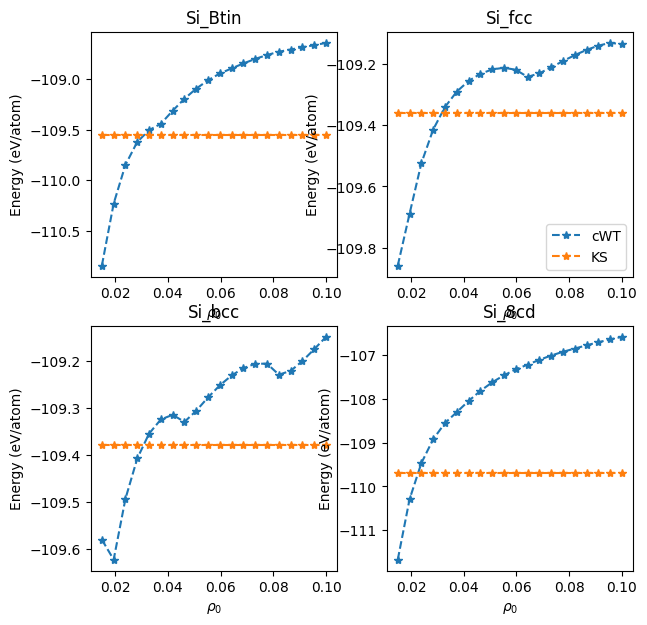

In [46]:
fig, axs = plt.subplots(2,2, figsize=(7,7))
im0 = axs[0,0].plot(rho0,np.asarray(Cwt_energy['Si_Btin'])*27.211407/4, '*--')
im0 = axs[0,0].plot(rho0,np.ones(len(np.asarray(rho0)))*Ks_Btin[index_KS_Btin]*27.211407/8, '*--')
im1 = axs[0,1].plot(rho0,np.asarray(Cwt_energy['Si_fcc'])*27.211407/4, '*--')
im1 = axs[0,1].plot(rho0,np.ones(len(np.asarray(rho0)))*Ks_fcc[index_KS_fcc]*27.211407/8, '*--')
im2 = axs[1,0].plot(rho0,np.asarray(Cwt_energy['Si_bcc'])*27.211407/2, '*--')
im2 = axs[1,0].plot(rho0,np.ones(len(np.asarray(rho0)))*Ks_bcc[index_KS_bcc]*27.211407/4, '*--')
im3 = axs[1,1].plot(rho0,np.asarray(Cwt_energy['Si_8cd'])*27.211407/8, '*--')
im3 = axs[1,1].plot(rho0,np.ones(len(np.asarray(rho0)))*Ks_8cd[index_KS_8cd]*27.211407/16, '*--')
axs[0,0].set_title('Si_Btin')
axs[0,1].set_title('Si_fcc')
axs[1,0].set_title('Si_bcc')
axs[1,1].set_title('Si_8cd')
# axs[2,1].set_title('Li')

axs[0,0].set_xlabel('$\u03C1_{0}$')
axs[0,0].set_ylabel('Energy (eV/atom)')
axs[0,1].set_xlabel('$\u03C1_{0}$')
axs[0,1].set_ylabel('Energy (eV/atom)')
axs[1,0].set_xlabel('$\u03C1_{0}$')
axs[1,0].set_ylabel('Energy (eV/atom)')
axs[1,1].set_xlabel('$\u03C1_{0}$')
axs[1,1].set_ylabel('Energy (eV/atom)')
# axs[2,0].set_xlabel('Volume ($\AA^{3}$)')
# axs[2,0].set_ylabel('Energy (eV/atom)')
# axs[0].legend(['Real', 'Predicted'])
axs[0,1].legend(['cWT', 'KS'])